#### Computing and evaluating network centralities with Python’s NetworkX through the following template.

In [1]:
import networkx as nx
import pandas as pd 
import numpy as np
# import seaborn as sns
# sns.set(context="paper", font="monospace")
import random
import matplotlib.pyplot as plt
import math
import operator
from collections import Counter
from itertools import combinations, permutations
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import warnings; warnings.simplefilter('ignore')

In [2]:
def create_centralities_list(G,maxiter=2000,pphi=5,centList=[]):
    if len(centList)==0:
        centList=['degree','closeness','betweenness','eigenvector','Katz','PageRank','HITS','load','communicability','current flow']
    cenLen=len(centList)
    valus={}
    for uu,centr in enumerate(centList):
        if centr=='degree':
            if isinstance(G,nx.DiGraph):
                cent=nx.in_degree_centrality(G)
                sstt='In Degree Centralities '
                valus['in_degree']=cent
                cent=nx.out_degree_centrality(G)
                sstt+= 'and Out Degree Centralities'
                valus['out_degree']=cent
            else:
                cent=nx.degree_centrality(G)
                sstt='Degree Centralities'
                ssttt='degree centrality'
                valus[centr]=cent
        elif centr=='closeness':
            cent=nx.closeness_centrality(G)
            sstt='Closeness Centralities'
            ssttt='closeness centrality'
            valus[centr]=cent
        elif centr =='load':
            cent=nx.load_centrality(G)
            sstt='Load Centraities'
            valus[centr]=cent
        elif centr == 'communicability':
            if not isinstance(G, nx.DiGraph):
                cent=nx.communicability_betweenness_centrality(G)
                sstt='Communicability Centralities'
                valus[centr]=cent
        elif centr=='betweenness':
            cent=nx.betweenness_centrality(G)
            sstt='Betweenness Centralities'
            ssttt='betweenness centrality'
            valus[centr]=cent
        elif centr=='current flow':
            if not isinstance(G, nx.DiGraph):
            
                cent=nx.current_flow_closeness_centrality(G)
                sstt='Current Flow Closeness Centrality'
                valus[centr]=cent
        elif centr=='eigenvector':
            try:
                cent=nx.eigenvector_centrality(G,max_iter=maxiter)
                sstt='Eigenvector Centralities'
                ssttt='eigenvector centrality'
                valus[centr]=cent

            except:
                valus[centr]=None

                continue
        elif centr=='Katz':
            phi = (1+math.sqrt(pphi))/2.0 # largest eigenvalue of adj matrix
            cent=nx.katz_centrality_numpy(G,1/phi-0.01)
            cent=nx.katz_centrality_numpy(G,.05)#,1/phi-0.01)
            
            sstt='Katz Centralities'
            ssttt='Katz centrality'
            valus[centr]=cent
#             valus[centr+'_%i' %pphi]=cent

        elif centr=='PageRank':
            try:
                cent=nx.pagerank(G)
                sstt='PageRank'
                ssttt='pagerank'
                valus[centr]=cent

            except:
                valus[centr]=None

                continue
        elif centr=='HITS':
            if isinstance(G,nx.DiGraph):
                dd=nx.hits(G,max_iter=maxiter)
                sstt='HITS hubs '
                valus['HITS_hubs']=dd[0]
                sstt+= 'and HITS authorities'
                valus['HITS_auths']=dd[1]
            else:
                dd=nx.hits(G,max_iter=maxiter)
                cent=nx.degree_centrality(G)
                sstt='HITS'
                ssttt='HITS Centralities'
                valus[centr]=dd[0]
        else:
            continue
#         print '%s done!!!' %sstt
    return valus

dindices=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
indices=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
# indices=['degree','closeness','betweenness','eigenvector']

# Without 'communicability' and 'current flow' (undirected case)
dindicesd=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
indicesd=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load']
# indicesd=['degree','closeness','betweenness','eigenvector']

dindicesdr=dindices
indicesdr=indices

# Plus 'node'
dindicesdrn=["node"]+dindices
indicesdrn=['node']+indices

def central_df(G,node,central_pd):
    central_pd[node]=central_pd.index.values
    if isinstance(G,nx.DiGraph):
        central_pd=central_pd[[node]+dindices]
    else:
        central_pd=central_pd[[node]+indices]
    central_pd[node]=central_pd.index.values
    central_pd.reset_index(drop = True, inplace = True)
    # central_pd=central_pd[['node']]
    central_pd.sort_values(node) #.head()
    # central_pd['node']=G.nodes()
    return central_pd

### 1. Florentine Families Graph

In [3]:
G=nx.florentine_families_graph()
name="Florentine Families Graph"

In [4]:
central_pd=pd.DataFrame(create_centralities_list(G))
node="node"
central_df(G,node,central_pd)

node    degree  closeness  betweenness  eigenvector      HITS  \
0     Acciaiuoli  0.071429   0.368421     0.000000     0.132157  0.037730   
1        Albizzi  0.214286   0.482759     0.212454     0.243961  0.069650   
2      Barbadori  0.142857   0.437500     0.093407     0.211706  0.060442   
3       Bischeri  0.214286   0.400000     0.104396     0.282794  0.080740   
4     Castellani  0.214286   0.388889     0.054945     0.259020  0.073952   
5         Ginori  0.071429   0.333333     0.000000     0.074925  0.021390   
6       Guadagni  0.285714   0.466667     0.254579     0.289117  0.082543   
7   Lamberteschi  0.071429   0.325581     0.000000     0.088793  0.025350   
8         Medici  0.428571   0.560000     0.521978     0.430315  0.122853   
9          Pazzi  0.071429   0.285714     0.000000     0.044815  0.012794   
10       Peruzzi  0.214286   0.368421     0.021978     0.275722  0.078721   
11       Ridolfi  0.214286   0.500000     0.113553     0.341554  0.097514   
12      Salviati  0.142857   0.388889     0.142857     0.145921  0.041659   
13       Strozzi  0.285714   0.437500     0.102564     0.355973  0.101633   
14    Tornabuoni  0.214286   0.482759     0.091575     0.325847  0.093028   

        Katz  PageRank      load  communicability  current flow  
0   0.237040  0.030657  0.000000         0.027055      0.036909  
1   0.262470  0.079122  0.210623         0.261155      0.055316  
2   0.250113  0.050301  0.093407         0.124094      0.050897  
3   0.262620  0.068862  0.104396         0.162607      0.055459  
4   0.261458  0.069330  0.054945         0.114575      0.052962  
5   0.235242  0.032418  0.000000         0.011310      0.032177  
6   0.273357  0.098399  0.250916         0.305821      0.061155  
7   0.235786  0.030909  0.000000         0.013586      0.034069  
8   0.298431  0.145818  0.521978         0.591358      0.070954  
9   0.234557  0.036054  0.000000         0.007073      0.026251  
10  0.262053  0.067875  0.021978         0.099599      0.051921  
11  0.263966  0.069574  0.117216         0.231622      0.060037  
12  0.248768  0.061303  0.142857         0.165934      0.039851  
13  0.274623  0.088098  0.106227         0.211959      0.058547  
14  0.263906  0.071279  0.089744         0.222783      0.060156

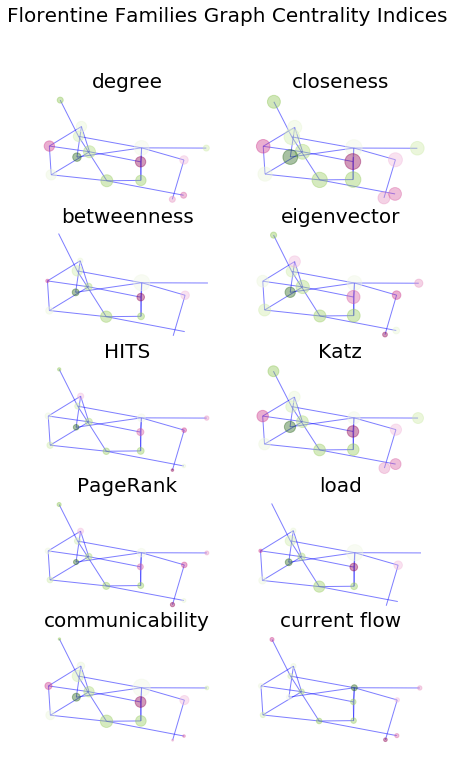

In [5]:
pos=nx.spring_layout(G,1.)
valus=create_centralities_list(G,maxiter=2000,pphi=5,centList=[])
if isinstance(G,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(G): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=valus[j].keys(),
                               node_size=[500*x for x in valus[j].values()],
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #pink, yellow, green
    nx.draw_networkx_edges(G,pos=pos,edge_color='b', alpha=0.5)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

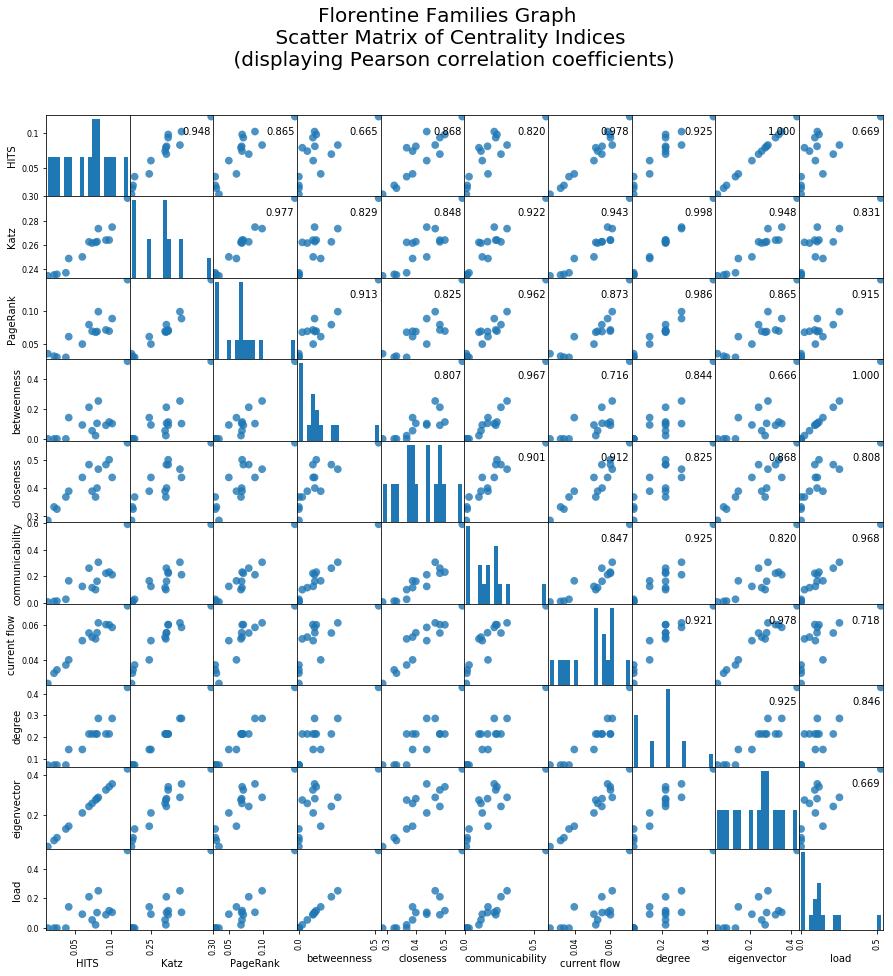

In [6]:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

**When running the cells below, in some case, you may need to change the parameter k in pos (here it is 1.) or the zooming parameter in the list of node_size (here it is 500).**  

### 2. Karate Club Graph

In [7]:
G=nx.karate_club_graph()
name="Karate Club Graph"

In [8]:
# Copy, paste and run cell 4 here:
central_pd=pd.DataFrame(create_centralities_list(G))
node="node"
central_df(G,node,central_pd)

node    degree  closeness  betweenness  eigenvector      HITS      Katz  \
0      0  0.484848   0.568966     0.437635     0.355483  0.071413  0.258081   
1      1  0.272727   0.485294     0.053937     0.265954  0.053427  0.205489   
2      2  0.303030   0.559322     0.143657     0.317189  0.063719  0.217703   
3      3  0.181818   0.464789     0.011909     0.211174  0.042423  0.182787   
4      4  0.090909   0.379310     0.000631     0.075966  0.015261  0.152544   
5      5  0.121212   0.383721     0.029987     0.079481  0.015967  0.159543   
6      6  0.121212   0.383721     0.029987     0.079481  0.015967  0.159543   
7      7  0.121212   0.440000     0.000000     0.170955  0.034343  0.167238   
8      8  0.151515   0.515625     0.055927     0.227405  0.045682  0.180862   
9      9  0.060606   0.434211     0.000848     0.102675  0.020626  0.148118   
10    10  0.090909   0.379310     0.000631     0.075966  0.015261  0.152544   
11    11  0.030303   0.366667     0.000000     0.052854  0.010618  0.136939   
12    12  0.060606   0.370787     0.000000     0.084252  0.016925  0.146079   
13    13  0.151515   0.515625     0.045863     0.226470  0.045495  0.180436   
14    14  0.060606   0.370787     0.000000     0.101406  0.020370  0.148674   
15    15  0.060606   0.370787     0.000000     0.101406  0.020370  0.148674   
16    16  0.060606   0.284483     0.000000     0.023635  0.004748  0.139990   
17    17  0.060606   0.375000     0.000000     0.092397  0.018562  0.147214   
18    18  0.060606   0.370787     0.000000     0.101406  0.020370  0.148674   
19    19  0.090909   0.500000     0.032475     0.147911  0.029713  0.160412   
20    20  0.060606   0.370787     0.000000     0.101406  0.020370  0.148674   
21    21  0.060606   0.375000     0.000000     0.092397  0.018562  0.147214   
22    22  0.060606   0.370787     0.000000     0.101406  0.020370  0.148674   
23    23  0.151515   0.392857     0.017614     0.150123  0.030156  0.172579   
24    24  0.090909   0.375000     0.002210     0.057054  0.011461  0.148929   
25    25  0.090909   0.375000     0.003840     0.059208  0.011894  0.149329   
26    26  0.060606   0.362637     0.000000     0.075582  0.015183  0.145462   
27    27  0.121212   0.458333     0.022333     0.133479  0.026813  0.164194   
28    28  0.090909   0.452055     0.001795     0.131079  0.026332  0.157336   
29    29  0.121212   0.383721     0.002922     0.134965  0.027112  0.164576   
30    30  0.121212   0.458333     0.014412     0.174760  0.035106  0.167991   
31    31  0.181818   0.540984     0.138276     0.191036  0.038376  0.184357   
32    32  0.363636   0.515625     0.145247     0.308651  0.062002  0.228805   
33    33  0.515152   0.550000     0.304075     0.373371  0.075003  0.263960   

    PageRank      load  communicability  current flow  
0   0.097002  0.434683         0.603031      0.058567  
1   0.052878  0.054936         0.287543      0.052525  
2   0.057078  0.148343         0.403343      0.055765  
3   0.035861  0.014234         0.180573      0.046827  
4   0.021979  0.000631         0.048145      0.032735  
5   0.029113  0.029987         0.079311      0.034106  
6   0.029113  0.029987         0.079311      0.034106  
7   0.024491  0.000000         0.115486      0.042033  
8   0.029765  0.051531         0.226617      0.047106  
9   0.014309  0.000789         0.043313      0.031630  
10  0.021979  0.000631         0.048145      0.032735  
11  0.009565  0.000000         0.014449      0.020377  
12  0.014645  0.000000         0.032312      0.030222  
13  0.029536  0.047888         0.215709      0.046758  
14  0.014535  0.000000         0.042483      0.030946  
15  0.014535  0.000000         0.042483      0.030946  
16  0.016785  0.000000         0.007873      0.023957  
17  0.014559  0.000000         0.038289      0.030849  
18  0.014535  0.000000         0.042483      0.030946  
19  0.019604  0.033920         0.107013      0.039096  
20  0.014535  0.000000         0.042483      0.030946  
21  0.

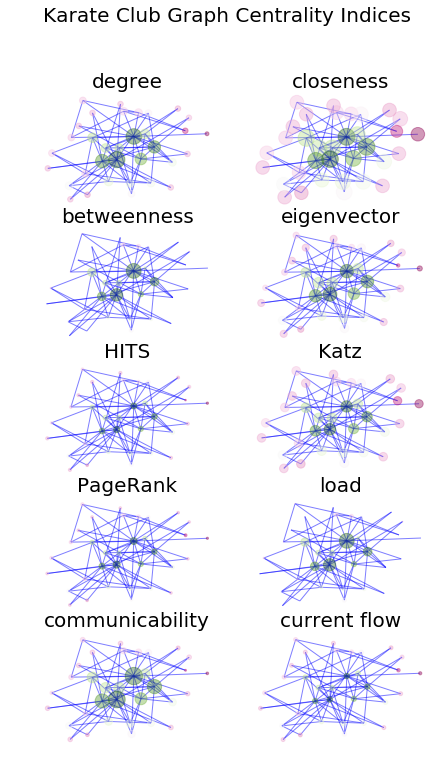

In [9]:
# Copy, paste and run cell 5 here:
pos=nx.spring_layout(G,1.)
valus=create_centralities_list(G,maxiter=2000,pphi=5,centList=[])
if isinstance(G,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(G): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=valus[j].keys(),
                               node_size=[500*x for x in valus[j].values()],
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #pink, yellow, green
    nx.draw_networkx_edges(G,pos=pos,edge_color='b', alpha=0.5)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

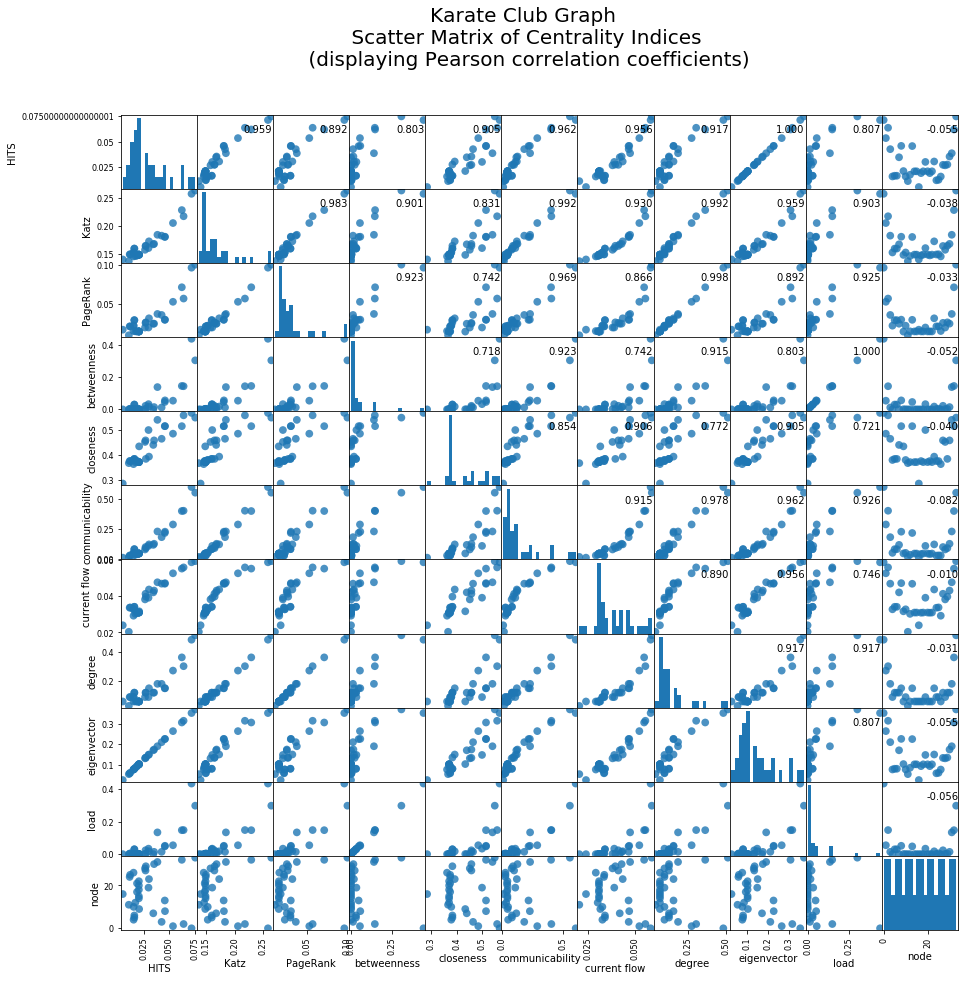

In [10]:
# Copy, paste and run cell 6 here:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

### 3. Erdos-Renyi Random Undirected Graph

In [11]:
while True:
    nodes=random.randint(30,40)
    p=random.uniform(0.05,0.08)
    G=nx.erdos_renyi_graph(nodes,p)
    if nx.is_connected(G)==True:
        break
name="Erdos-Renyi Random Undirected Graph\n"

In [12]:
# Copy, paste and run cell 4 here:
central_pd=pd.DataFrame(create_centralities_list(G))
node="node"
central_df(G,node,central_pd)

node    degree  closeness  betweenness  eigenvector      HITS      Katz  \
0      0  0.108108   0.280303     0.081381     0.072220  0.014066  0.166897   
1      1  0.054054   0.245033     0.000000     0.044817  0.008727  0.152720   
2      2  0.081081   0.327434     0.029855     0.196712  0.038311  0.162927   
3      3  0.054054   0.289062     0.000000     0.142424  0.027739  0.154430   
4      4  0.054054   0.298387     0.033183     0.103034  0.020067  0.153935   
5      5  0.135135   0.321739     0.081006     0.224246  0.043674  0.176795   
6      6  0.135135   0.377551     0.179930     0.264500  0.051511  0.178821   
7      7  0.081081   0.359223     0.055330     0.223112  0.043452  0.163437   
8      8  0.108108   0.293651     0.091341     0.077050  0.015005  0.167648   
9      9  0.027027   0.268116     0.000000     0.053208  0.010362  0.144754   
10    10  0.081081   0.270073     0.064439     0.045988  0.008956  0.159182   
11    11  0.027027   0.250000     0.000000     0.040530  0.007893  0.144329   
12    12  0.108108   0.359223     0.088288     0.220069  0.042859  0.170625   
13    13  0.054054   0.268116     0.019970     0.055711  0.010850  0.152686   
14    14  0.108108   0.342593     0.104454     0.189292  0.036865  0.169840   
15    15  0.135135   0.385417     0.173599     0.263802  0.051377  0.178439   
16    16  0.108108   0.352381     0.093969     0.202165  0.039372  0.169881   
17    17  0.027027   0.213873     0.000000     0.011916  0.002321  0.144219   
18    18  0.081081   0.284615     0.068569     0.073979  0.014407  0.160348   
19    19  0.027027   0.245033     0.000000     0.058103  0.011316  0.145099   
20    20  0.108108   0.362745     0.100425     0.205349  0.039992  0.169890   
21    21  0.108108   0.324561     0.063989     0.186727  0.036364  0.169478   
22    22  0.054054   0.284615     0.037412     0.064298  0.012522  0.152713   
23    23  0.054054   0.260563     0.012012     0.063375  0.012342  0.152733   
24    24  0.081081   0.308333     0.051026     0.142794  0.027811  0.161639   
25    25  0.081081   0.251701     0.010511     0.057859  0.011267  0.159993   
26    26  0.081081   0.327434     0.125075     0.101274  0.019724  0.161521   
27    27  0.135135   0.389474     0.141542     0.290518  0.056579  0.179204   
28    28  0.135135   0.406593     0.223048     0.272652  0.053101  0.179152   
29    29  0.081081   0.330357     0.057432     0.156423  0.030464  0.161394   
30    30  0.162162   0.381443     0.185986     0.325432  0.063380  0.186607   
31    31  0.081081   0.333333     0.032683     0.172705  0.033634  0.162186   
32    32  0.135135   0.362745     0.098098     0.271152  0.052809  0.178113   
33    33  0.108108   0.316239     0.134384     0.115104  0.022415  0.169219   
34    34  0.027027   0.222892     0.000000     0.019169  0.003733  0.144277   
35    35  0.027027   0.228395     0.000000     0.019965  0.003888  0.144642   
36    36  0.054054   0.313559     0.052052     0.088317  0.017200  0.153564   
37    37  0.027027   0.220238     0.000000     0.018712  0.003645  0.144605   

    PageRank      load  communicability  current flow  
0   0.038055  0.081582         0.094038      0.019629  
1   0.018792  0.000000         0.015274      0.015256  
2   0.023906  0.030593         0.069127      0.022079  
3   0.017499  0.000000         0.028044      0.018401  
4   0.018572  0.031698         0.053589      0.018253  
5   0.041252  0.081456         0.127209      0.023050  
6   0.038101  0.177177         0.234671      0.026194  
7   0.023365  0.054075         0.098752      0.023131  
8   0.037315  0.093468         0.108121      0.020076  
9   0.011054  0.000000         0.004031      0.012649  
10  0.030844  0.064690         0.071819      0.016568  
11  0.011616  0.000000         0.002561      0.011591  
12  0.030742  0.089277         0.128863      0.024809  
13  0.019273  0.020521         0.027576      0.017104  
14  0.032040  0.102743         0.141035      0.023968  
15  0.038490  0.173392    

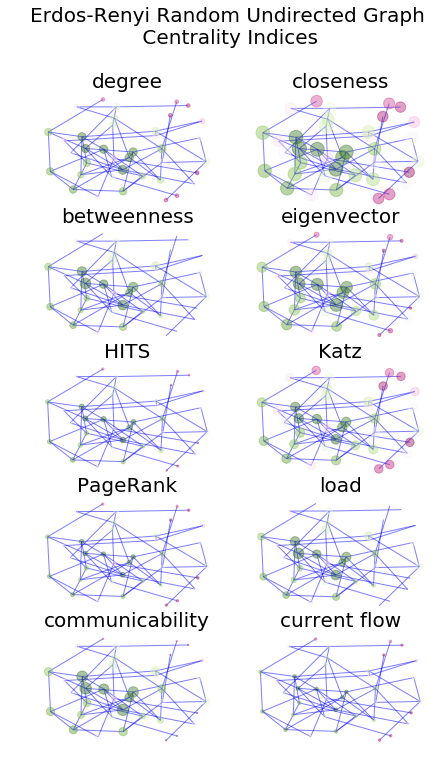

In [13]:
# Copy, paste and run cell 5 here:
pos=nx.spring_layout(G,1.)
valus=create_centralities_list(G,maxiter=2000,pphi=5,centList=[])
if isinstance(G,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(G): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=valus[j].keys(),
                               node_size=[500*x for x in valus[j].values()],
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #pink, yellow, green
    nx.draw_networkx_edges(G,pos=pos,edge_color='b', alpha=0.5)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

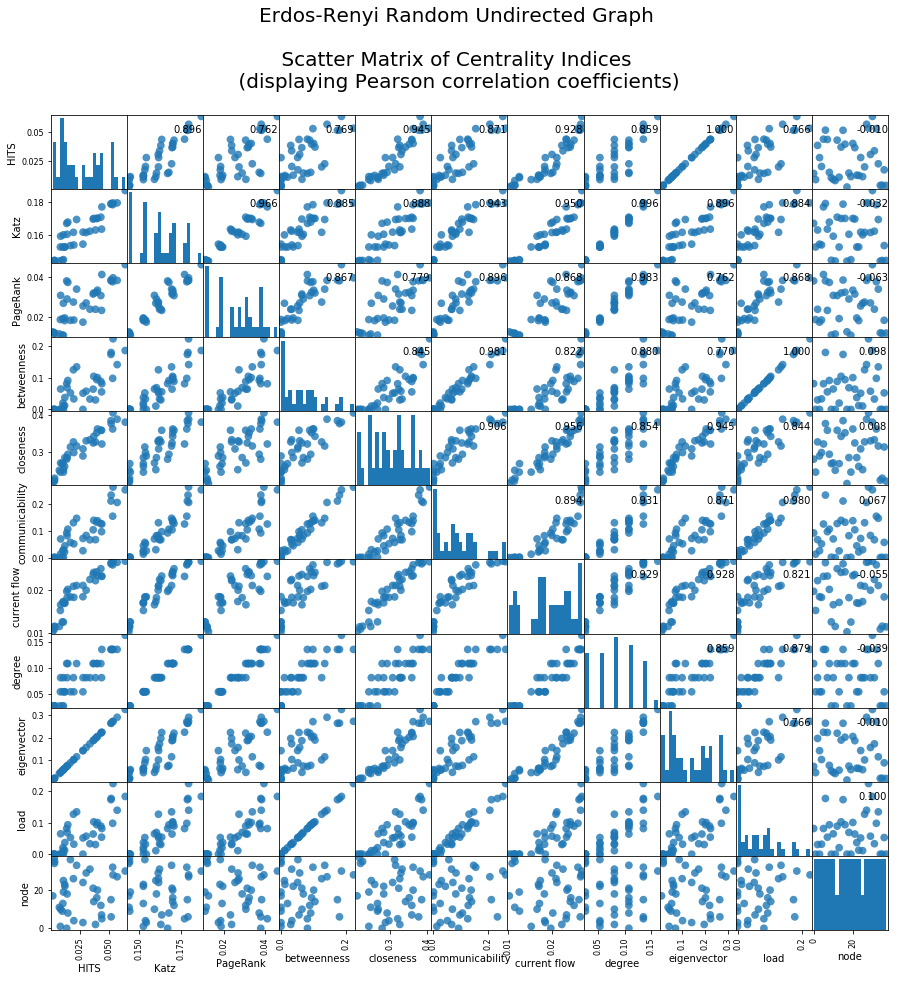

In [14]:
# Copy, paste and run cell 6 here:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

### 4. Gnm Random Undirected Graph

In [15]:
while True:
    nodes=random.randint(30,40)
    edges=random.randint(50,70)
    G=nx.gnm_random_graph(nodes,edges)
    if nx.is_connected(G)==True:
        break
name="Gnm Random Undirected Graph/n"

In [16]:
# Copy, paste and run cell 4 here:
central_pd=pd.DataFrame(create_centralities_list(G))
node="node"
central_df(G,node,central_pd)

node    degree  closeness  betweenness  eigenvector      HITS      Katz  \
0      0  0.030303   0.294643     0.000000     0.031554  0.005863  0.143428   
1      1  0.151515   0.412500     0.047366     0.204977  0.038090  0.178808   
2      2  0.060606   0.362637     0.015188     0.107569  0.019990  0.153961   
3      3  0.151515   0.392857     0.051066     0.195430  0.036318  0.178389   
4      4  0.090909   0.330000     0.020802     0.050307  0.009348  0.158569   
5      5  0.181818   0.428571     0.132892     0.223233  0.041484  0.187198   
6      6  0.060606   0.314286     0.008207     0.059692  0.011093  0.151873   
7      7  0.090909   0.351064     0.030792     0.082263  0.015286  0.159981   
8      8  0.121212   0.407407     0.048142     0.155715  0.028936  0.170451   
9      9  0.090909   0.392857     0.045289     0.096488  0.017930  0.161133   
10    10  0.151515   0.388235     0.054784     0.149097  0.027706  0.176348   
11    11  0.121212   0.402439     0.035405     0.155933  0.028977  0.169551   
12    12  0.121212   0.417722     0.037895     0.199548  0.037081  0.172218   
13    13  0.060606   0.366667     0.006392     0.100149  0.018610  0.153230   
14    14  0.090909   0.397590     0.025767     0.136368  0.025341  0.162711   
15    15  0.090909   0.326733     0.020407     0.059675  0.011090  0.159013   
16    16  0.151515   0.423077     0.076202     0.188635  0.035053  0.179001   
17    17  0.121212   0.397590     0.043212     0.150934  0.028047  0.170800   
18    18  0.151515   0.434211     0.058722     0.226756  0.042138  0.179454   
19    19  0.060606   0.336735     0.003698     0.070232  0.013051  0.152662   
20    20  0.060606   0.336735     0.003120     0.111354  0.020692  0.154306   
21    21  0.121212   0.412500     0.040088     0.157014  0.029177  0.169892   
22    22  0.151515   0.452055     0.069495     0.230872  0.042902  0.181038   
23    23  0.090909   0.333333     0.000000     0.138149  0.025673  0.161812   
24    24  0.090909   0.392857     0.012773     0.168253  0.031266  0.164032   
25    25  0.242424   0.434211     0.111666     0.300213  0.055787  0.202775   
26    26  0.212121   0.412500     0.086231     0.227536  0.042282  0.192089   
27    27  0.121212   0.351064     0.006360     0.177043  0.032901  0.170726   
28    28  0.151515   0.434211     0.109743     0.172828  0.032117  0.178569   
29    29  0.212121   0.440000     0.139239     0.269670  0.050113  0.194527   
30    30  0.212121   0.423077     0.110363     0.282279  0.052457  0.195866   
31    31  0.151515   0.412500     0.094882     0.149547  0.027789  0.177306   
32    32  0.181818   0.445946     0.138011     0.183758  0.034147  0.185638   
33    33  0.090909   0.392857     0.012773     0.168253  0.031266  0.164032   

    PageRank      load  communicability  current flow  
0   0.010815  0.000000         0.004242      0.018301  
1   0.034441  0.048293         0.123712      0.046247  
2   0.015870  0.016769         0.031344      0.031000  
3   0.033950  0.051468         0.113270      0.043581  
4   0.024626  0.022717         0.033600      0.033448  
5   0.041530  0.133624         0.204037      0.048294  
6   0.017287  0.008523         0.021965      0.027571  
7   0.023422  0.030358         0.049885      0.036039  
8   0.028423  0.049469         0.089929      0.043389  
9   0.023244  0.048432         0.067496      0.036583  
10  0.036055  0.055828         0.105007      0.045053  
11  0.027823  0.035738         0.081564      0.042886  
12  0.027528  0.035371         0.109732      0.043944  
13  0.015978  0.007126         0.024796      0.030533  
14  0.022093  0.027195         0.061043      0.038256  
15  0.024678  0.021458         0.038514      0.032812  
16  0.034835  0.074849         0.141600      0.047046  
17  0.028758  0.042001         0.101696      0.042899  
18  0.033333  0.059559         0.140708      0.047673  
19  0.016512  0.003667         0.022204      0.029870  
20  0.015862  0.002753         0.027492      0.030733  
21  0.

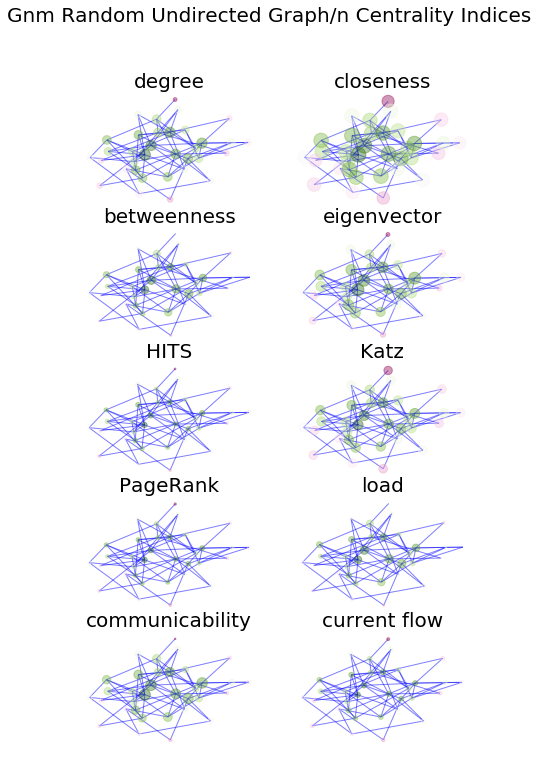

In [17]:
# Copy, paste and run cell 5 here:
pos=nx.spring_layout(G,1.)
valus=create_centralities_list(G,maxiter=2000,pphi=5,centList=[])
if isinstance(G,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(G): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=valus[j].keys(),
                               node_size=[500*x for x in valus[j].values()],
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #pink, yellow, green
    nx.draw_networkx_edges(G,pos=pos,edge_color='b', alpha=0.5)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

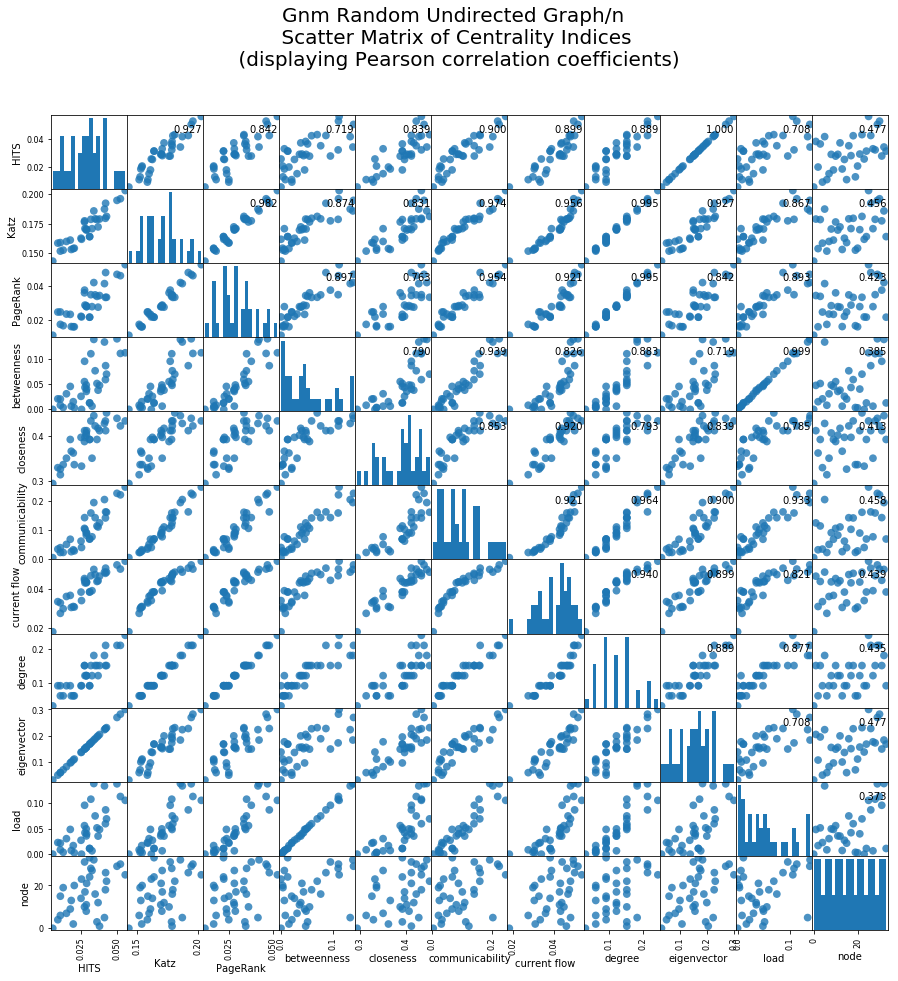

In [18]:
# Copy, paste and run cell 6 here:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

### 5. Strogatz-Watts Small-World Graph

In [19]:
nodes=random.randint(30,40)
k=random.randint(4,7) #Each node is joined with its k nearest neighbors in a ring topology
p=random.uniform(0.7,0.8) #rewiring probability
G=nx.watts_strogatz_graph(nodes, k, p)
name="Strogatz-Watts Small-World Graph\n"

In [20]:
# Copy, paste and run cell 4 here:
central_pd=pd.DataFrame(create_centralities_list(G))
node="node"
central_df(G,node,central_pd)

node    degree  closeness  betweenness  eigenvector      HITS      Katz  \
0      0  0.205882   0.414634     0.096249     0.195882  0.036420  0.191248   
1      1  0.117647   0.404762     0.039456     0.134082  0.024931  0.167223   
2      2  0.058824   0.354167     0.000000     0.132440  0.024627  0.152819   
3      3  0.117647   0.404762     0.039485     0.211480  0.039324  0.170683   
4      4  0.205882   0.453333     0.105966     0.317793  0.059092  0.194031   
5      5  0.235294   0.478873     0.138624     0.368166  0.068459  0.203327   
6      6  0.088235   0.386364     0.011069     0.156120  0.029029  0.161246   
7      7  0.117647   0.369565     0.021900     0.133669  0.024853  0.168603   
8      8  0.117647   0.435897     0.063976     0.165691  0.030808  0.169818   
9      9  0.088235   0.395349     0.020049     0.129989  0.024169  0.161707   
10    10  0.088235   0.395349     0.042252     0.127944  0.023790  0.160594   
11    11  0.088235   0.350515     0.020028     0.079790  0.014836  0.158154   
12    12  0.117647   0.386364     0.043339     0.113634  0.021129  0.167615   
13    13  0.117647   0.386364     0.041769     0.121334  0.022561  0.167330   
14    14  0.176471   0.459459     0.094399     0.295407  0.054929  0.187721   
15    15  0.088235   0.357895     0.026480     0.072948  0.013564  0.158468   
16    16  0.088235   0.404762     0.039789     0.113624  0.021127  0.160866   
17    17  0.088235   0.400000     0.041062     0.116785  0.021714  0.161269   
18    18  0.147059   0.382022     0.046906     0.153065  0.028459  0.175850   
19    19  0.058824   0.336634     0.004902     0.065441  0.012168  0.150591   
20    20  0.117647   0.395349     0.049201     0.121521  0.022595  0.167357   
21    21  0.088235   0.365591     0.022239     0.102202  0.019003  0.160059   
22    22  0.088235   0.386364     0.026384     0.145890  0.027127  0.161049   
23    23  0.088235   0.365591     0.022995     0.131911  0.024528  0.160206   
24    24  0.176471   0.441558     0.101761     0.227515  0.042305  0.184865   
25    25  0.147059   0.447368     0.096759     0.171079  0.031811  0.176980   
26    26  0.147059   0.390805     0.060861     0.159114  0.029586  0.174452   
27    27  0.058824   0.330097     0.010577     0.060613  0.011270  0.150822   
28    28  0.088235   0.390805     0.026761     0.146943  0.027323  0.161413   
29    29  0.088235   0.400000     0.029181     0.155544  0.028922  0.161523   
30    30  0.058824   0.340000     0.007427     0.070657  0.013138  0.151281   
31    31  0.117647   0.369565     0.040397     0.099628  0.018525  0.166131   
32    32  0.117647   0.404762     0.050567     0.204039  0.037940  0.170629   
33    33  0.235294   0.485714     0.173162     0.271880  0.050553  0.201040   
34    34  0.088235   0.326923     0.000000     0.104239  0.019381  0.160517   

    PageRank      load  communicability  current flow  
0   0.047167  0.097471         0.168158      0.049247  
1   0.028350  0.039711         0.072093      0.041850  
2   0.015659  0.000000         0.027226      0.029726  
3   0.027555  0.037542         0.104601      0.043188  
4   0.046745  0.105923         0.220538      0.051190  
5   0.051968  0.133885         0.295392      0.054533  
6   0.021805  0.011636         0.059199      0.036912  
7   0.027996  0.022839         0.071588      0.038975  
8   0.027825  0.063676         0.110245      0.043249  
9   0.021709  0.018977         0.065677      0.037794  
10  0.022178  0.044155         0.061578      0.037264  
11  0.023323  0.021378         0.033706      0.034700  
12  0.028924  0.044130         0.075644      0.041896  
13  0.029306  0.041889         0.077183      0.040974  
14  0.040216  0.093958         0.213785      0.049136  
15  0.023186  0.027691         0.038477      0.035068  
16  0.022078  0.041362         0.063053      0.037925  
17  0.022253  0.041914         0.071957      0.037319  
18  0.034593  0.047596         0.097173      0.042640  
19  0.016823  0.005137         0.016511

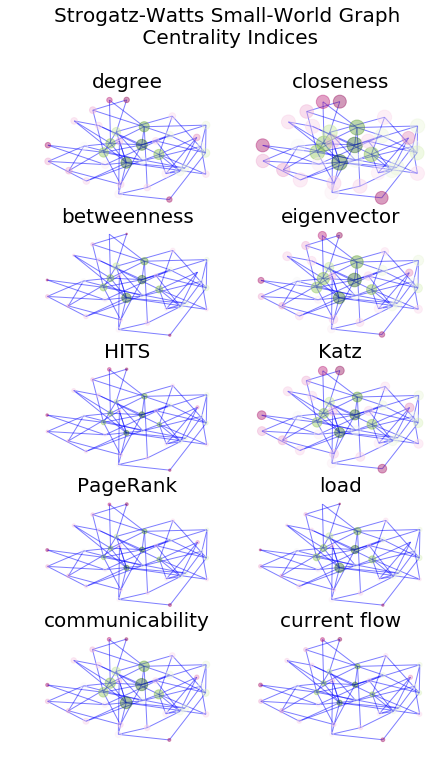

In [21]:
# Copy, paste and run cell 5 here:
pos=nx.spring_layout(G,1.)
valus=create_centralities_list(G,maxiter=2000,pphi=5,centList=[])
if isinstance(G,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(G): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=valus[j].keys(),
                               node_size=[500*x for x in valus[j].values()],
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #pink, yellow, green
    nx.draw_networkx_edges(G,pos=pos,edge_color='b', alpha=0.5)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

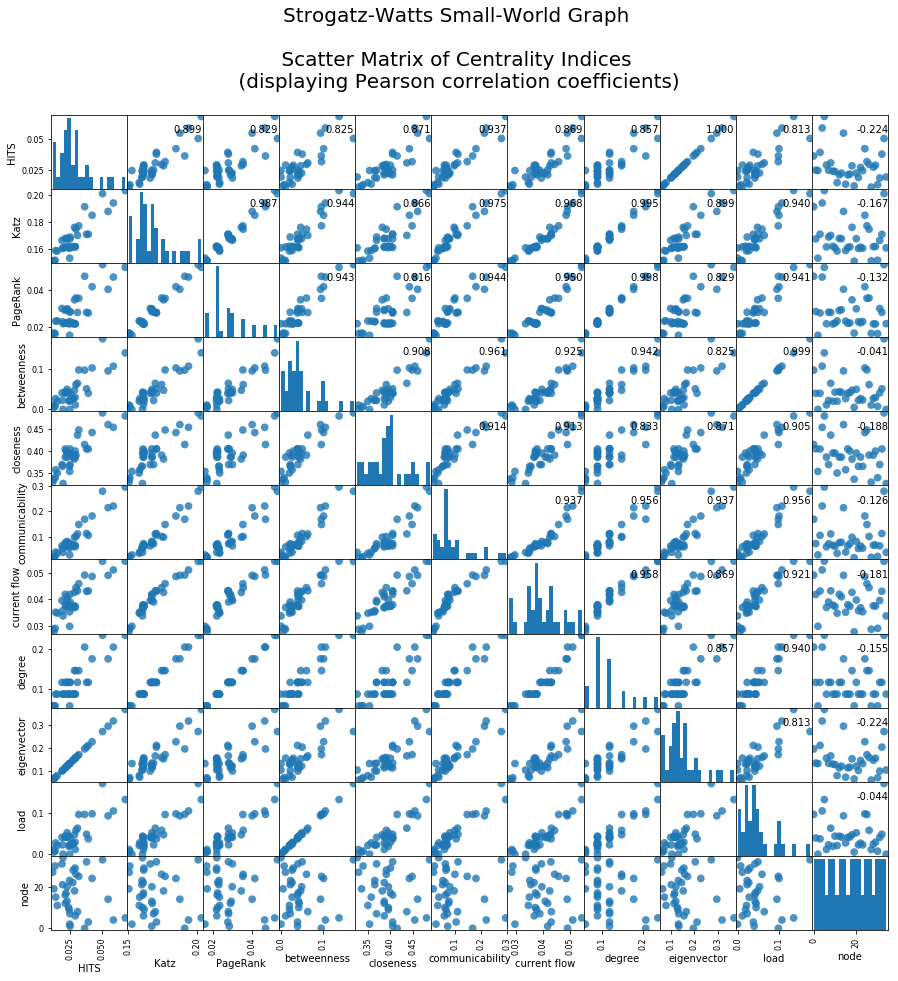

In [22]:
# Copy, paste and run cell 6 here:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

### 6. Barabasi-Albert Preferential Attachment Graph

In [23]:
n=random.randint(30,40) #no of nodes
m=random.randint(3,6)   #Number of edges to attach from a new node to existing nodes
G=nx.barabasi_albert_graph(n, m)
name="Barabasi-Albert Preferential Attachment Graph\n"

In [24]:
# Copy, paste and run cell 4 here:
central_pd=pd.DataFrame(create_centralities_list(G))
node="node"
central_df(G,node,central_pd)

node    degree  closeness  betweenness  eigenvector      HITS      Katz  \
0      0  0.200000   0.555556     0.003927     0.115973  0.022143  0.145131   
1      1  0.333333   0.600000     0.015537     0.182480  0.034841  0.182305   
2      2  0.200000   0.545455     0.001929     0.132684  0.025334  0.150351   
3      3  0.300000   0.588235     0.014214     0.171176  0.032683  0.174215   
4      4  0.233333   0.555556     0.011419     0.125166  0.023898  0.152715   
5      5  0.366667   0.612245     0.019129     0.203355  0.038827  0.193144   
6      6  0.700000   0.769231     0.120511     0.334931  0.063950  0.272149   
7      7  0.366667   0.612245     0.018810     0.207532  0.039625  0.192818   
8      8  0.633333   0.731707     0.089750     0.316330  0.060398  0.258854   
9      9  0.566667   0.697674     0.069269     0.288313  0.055049  0.242057   
10    10  0.466667   0.652174     0.038840     0.248069  0.047365  0.218481   
11    11  0.433333   0.638298     0.052624     0.215072  0.041064  0.204876   
12    12  0.400000   0.625000     0.036253     0.198520  0.037904  0.194242   
13    13  0.366667   0.612245     0.031416     0.191017  0.036471  0.188737   
14    14  0.300000   0.576923     0.012537     0.176212  0.033645  0.175276   
15    15  0.400000   0.625000     0.032330     0.198473  0.037895  0.195071   
16    16  0.333333   0.588235     0.031612     0.152482  0.029114  0.172980   
17    17  0.266667   0.555556     0.004971     0.153726  0.029351  0.164689   
18    18  0.233333   0.555556     0.008627     0.121534  0.023205  0.150744   
19    19  0.366667   0.612245     0.031142     0.179412  0.034256  0.185228   
20    20  0.333333   0.588235     0.027992     0.142067  0.027125  0.169259   
21    21  0.266667   0.576923     0.009933     0.148956  0.028441  0.163059   
22    22  0.233333   0.566038     0.006478     0.141810  0.027076  0.157696   
23    23  0.200000   0.545455     0.003785     0.127500  0.024344  0.148562   
24    24  0.233333   0.555556     0.008057     0.128643  0.024562  0.152754   
25    25  0.233333   0.545455     0.007180     0.109023  0.020816  0.147554   
26    26  0.233333   0.555556     0.015901     0.095653  0.018263  0.143870   
27    27  0.200000   0.545455     0.005907     0.113118  0.021598  0.144372   
28    28  0.200000   0.535714     0.004993     0.105123  0.020071  0.141545   
29    29  0.200000   0.545455     0.005653     0.111142  0.021221  0.144078   
30    30  0.200000   0.526316     0.006399     0.101941  0.019464  0.140536   

    PageRank      load  communicability  current flow  
0   0.021566  0.004098         0.119002      0.111927  
1   0.032747  0.015582         0.276846      0.146958  
2   0.021220  0.001919         0.148279      0.112590  
3   0.030142  0.014047         0.245061      0.139308  
4   0.024699  0.011521         0.144889      0.122395  
5   0.035627  0.018881         0.334651      0.153482  
6   0.065049  0.119846         0.702419      0.194966  
7   0.035775  0.018938         0.337605      0.153210  
8   0.058995  0.088881         0.654626      0.189355  
9   0.053235  0.068737         0.575794      0.182053  
10  0.044408  0.038685         0.460818      0.169604  
11  0.042222  0.052443         0.380771      0.164444  
12  0.039135  0.036369         0.324869      0.158723  
13  0.035853  0.031377         0.303636      0.153674  
14  0.030102  0.012559         0.253923      0.139218  
15  0.039026  0.032493         0.326766      0.158604  
16  0.033738  0.031912         0.215159      0.146075  
17  0.027174  0.004971         0.198718      0.130348  
18  0.024751  0.008793         0.134022      0.121281  
19  0.036180  0.031165         0.277276      0.153440  
20  0.033977  0.028258         0.190253      0.145770  
21  0.027390  0.010234         0.190220      0.130826  
22  0.024310  0.006572         0.174375      0.122705  
23  0.021414  0.003818         0.138827      0.112399  
24  0.024482  0.008165         0.144925      0.122024  
25  0.024640  0.007

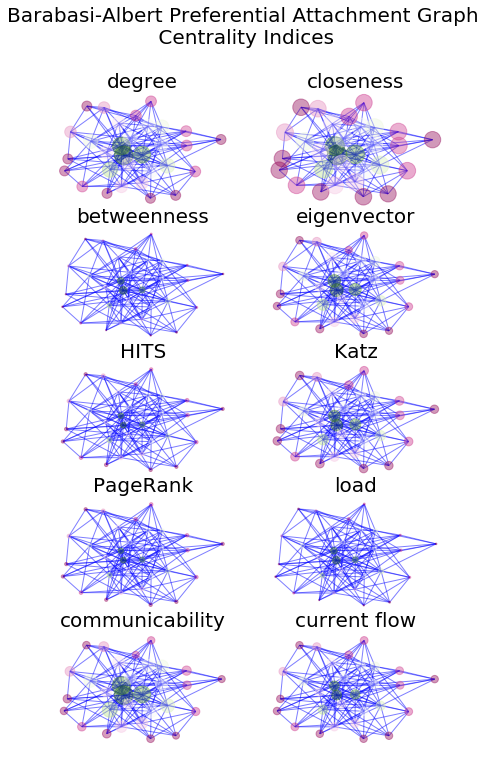

In [25]:
# Copy, paste and run cell 5 here:
pos=nx.spring_layout(G,0.1)
valus=create_centralities_list(G,maxiter=2000,pphi=5,centList=[])
if isinstance(G,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(G): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=valus[j].keys(),
                               node_size=[500*x for x in valus[j].values()],
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #pink, yellow, green
    nx.draw_networkx_edges(G,pos=pos,edge_color='b', alpha=0.5)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

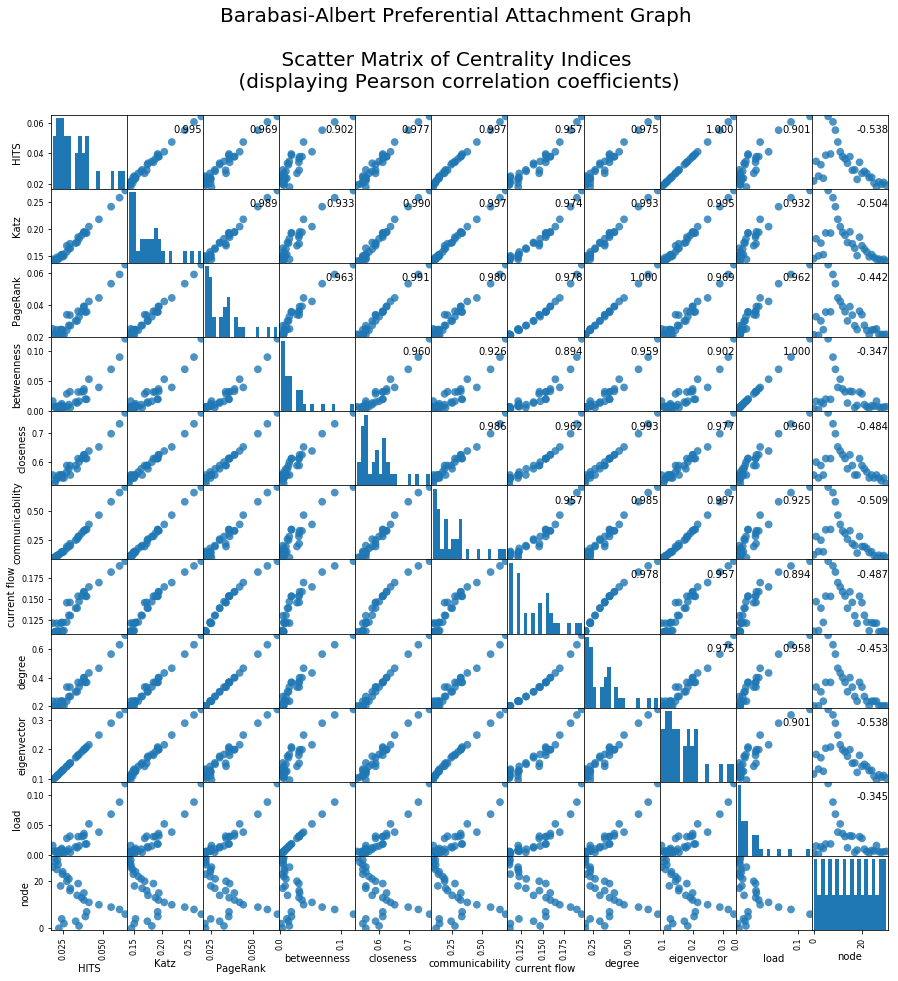

In [26]:
# Copy, paste and run cell 6 here:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

### 7. Random Regular Graph

In [27]:
while True:
    n=random.randint(30,40) #no of nodes
    d=random.randint(4,7) #the common degree of nodes
    if n*d%2==0 and nx.is_connected(G)==True:
        break
G=nx.random_regular_graph(d, n)
name="Random Regular Graph"

In [28]:
# Copy, paste and run cell 4 here:
central_pd=pd.DataFrame(create_centralities_list(G))
node="node"
central_df(G,node,central_pd)

node    degree  closeness  betweenness  eigenvector      HITS      Katz  \
0      0  0.162162   0.468354     0.033027     0.162221  0.026316  0.162221   
1      1  0.162162   0.451220     0.031005     0.162221  0.026316  0.162221   
2      2  0.162162   0.451220     0.029244     0.162221  0.026316  0.162221   
3      3  0.162162   0.451220     0.028400     0.162221  0.026316  0.162221   
4      4  0.162162   0.474359     0.032259     0.162221  0.026316  0.162221   
5      5  0.162162   0.456790     0.029018     0.162221  0.026316  0.162221   
6      6  0.162162   0.474359     0.031856     0.162221  0.026316  0.162221   
7      7  0.162162   0.456790     0.034499     0.162221  0.026316  0.162221   
8      8  0.162162   0.468354     0.033856     0.162221  0.026316  0.162221   
9      9  0.162162   0.451220     0.023958     0.162221  0.026316  0.162221   
10    10  0.162162   0.456790     0.028186     0.162221  0.026316  0.162221   
11    11  0.162162   0.462500     0.023976     0.162221  0.026316  0.162221   
12    12  0.162162   0.468354     0.031109     0.162221  0.026316  0.162221   
13    13  0.162162   0.451220     0.025697     0.162221  0.026316  0.162221   
14    14  0.162162   0.462500     0.030099     0.162221  0.026316  0.162221   
15    15  0.162162   0.474359     0.036292     0.162221  0.026316  0.162221   
16    16  0.162162   0.456790     0.024146     0.162221  0.026316  0.162221   
17    17  0.162162   0.468354     0.030344     0.162221  0.026316  0.162221   
18    18  0.162162   0.462500     0.032055     0.162221  0.026316  0.162221   
19    19  0.162162   0.486842     0.039032     0.162221  0.026316  0.162221   
20    20  0.162162   0.462500     0.029583     0.162221  0.026316  0.162221   
21    21  0.162162   0.480519     0.032951     0.162221  0.026316  0.162221   
22    22  0.162162   0.462500     0.032888     0.162221  0.026316  0.162221   
23    23  0.162162   0.486842     0.039280     0.162221  0.026316  0.162221   
24    24  0.162162   0.480519     0.042550     0.162221  0.026316  0.162221   
25    25  0.162162   0.462500     0.036913     0.162221  0.026316  0.162221   
26    26  0.162162   0.462500     0.030494     0.162221  0.026316  0.162221   
27    27  0.162162   0.462500     0.025368     0.162221  0.026316  0.162221   
28    28  0.162162   0.480519     0.039448     0.162221  0.026316  0.162221   
29    29  0.162162   0.462500     0.033995     0.162221  0.026316  0.162221   
30    30  0.162162   0.462500     0.030756     0.162221  0.026316  0.162221   
31    31  0.162162   0.468354     0.036562     0.162221  0.026316  0.162221   
32    32  0.162162   0.474359     0.036889     0.162221  0.026316  0.162221   
33    33  0.162162   0.468354     0.031377     0.162221  0.026316  0.162221   
34    34  0.162162   0.468354     0.030428     0.162221  0.026316  0.162221   
35    35  0.162162   0.462500     0.033295     0.162221  0.026316  0.162221   
36    36  0.162162   0.468354     0.034080     0.162221  0.026316  0.162221   
37    37  0.162162   0.456790     0.028299     0.162221  0.026316  0.162221   

    PageRank      load  communicability  current flow  
0   0.026316  0.033452         0.112150      0.070215  
1   0.026316  0.030543         0.112099      0.070304  
2   0.026316  0.028086         0.112116      0.070302  
3   0.026316  0.028053         0.111941      0.070158  
4   0.026316  0.033517         0.112345      0.070287  
5   0.026316  0.029056         0.110731      0.069640  
6   0.026316  0.032474         0.112492      0.070475  
7   0.026316  0.033634         0.112368      0.070294  
8   0.026316  0.033951         0.113200      0.070712  
9   0.026316  0.023021         0.111085      0.070050  
10  0.026316  0.028207         0.110642      0.069718  
11  0.026316  0.024456         0.110074      0.069660  
12  0.026316  0.031000         0.111997      0.070236  
13  0.026316  0.025674         0.110855      0.069913  
14  0.026316  0.028831         0.112406      0.070453  
15  0.026316  0.037479    

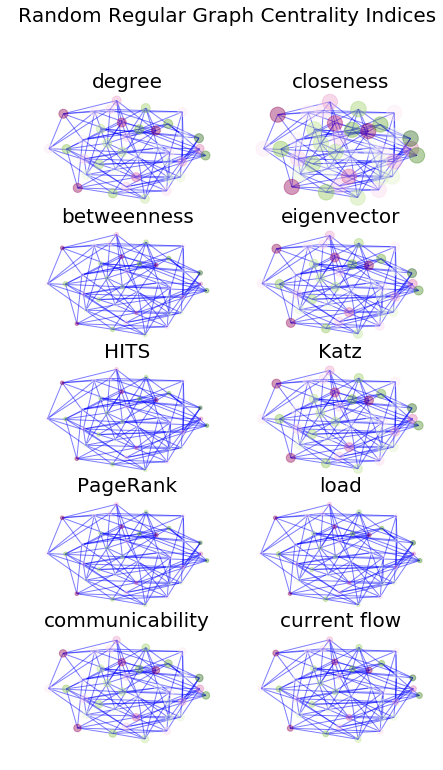

In [29]:
# Copy, paste and run cell 5 here:
pos=nx.spring_layout(G,1.)
valus=create_centralities_list(G,maxiter=2000,pphi=5,centList=[])
if isinstance(G,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(G): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=valus[j].keys(),
                               node_size=[500*x for x in valus[j].values()],
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #pink, yellow, green
    nx.draw_networkx_edges(G,pos=pos,edge_color='b', alpha=0.5)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

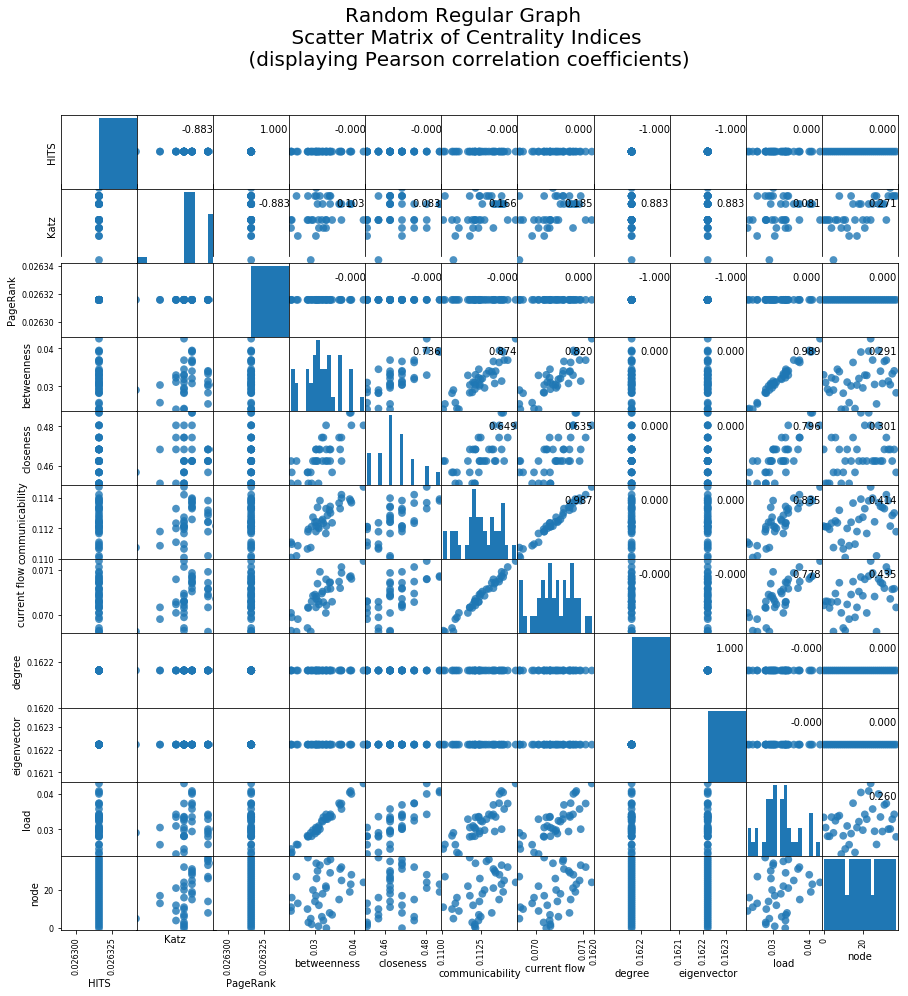

In [30]:
# Copy, paste and run cell 6 here:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

### 8. Random Bibartite Graph

In [31]:
while True:
    n = random.randint(10,15)   #nodes of the first partition
    m = random.randint(10,15)   #nodes of the second partition
    p=random.uniform(0.1,0.2)   #probability of edge existence
    alls=[]
    for y in range(n,n+m):
        for x in range(n):
            alls.append((x,y))
    eds=random.sample(alls,int(p*len(alls)))
    G=nx.Graph()
    G.add_edges_from(eds)
    if nx.is_connected(G)==True:
        break
name="Random Bibartite Graph"

In [32]:
# Copy, paste and run cell 4 here:
central_pd=pd.DataFrame(create_centralities_list(G))
node="node"
central_df(G,node,central_pd)

node  degree  closeness  betweenness  eigenvector      HITS      Katz  \
0      0    0.20   0.392157     0.245439     0.391030  0.109930  0.237945   
1      1    0.10   0.253165     0.100000     0.043325  0.012179  0.212930   
2      2    0.05   0.281690     0.000000     0.124453  0.034987  0.203961   
3      3    0.05   0.317460     0.000000     0.144755  0.040695  0.204525   
4      4    0.10   0.273973     0.065614     0.050168  0.014102  0.213467   
5      7    0.05   0.215054     0.000000     0.020302  0.005707  0.202738   
6      9    0.20   0.363636     0.157368     0.384945  0.108219  0.237410   
7     11    0.20   0.425532     0.441754     0.347900  0.097803  0.237884   
8     12    0.10   0.259740     0.052982     0.054942  0.015445  0.213467   
9     13    0.15   0.350877     0.278947     0.183335  0.051540  0.225366   
10    14    0.25   0.454545     0.511579     0.458453  0.131328  0.249221   
11    16    0.10   0.312500     0.117895     0.140814  0.040337  0.214635   
12    17    0.10   0.270270     0.100000     0.064298  0.018419  0.213470   
13    18    0.05   0.263158     0.000000     0.057888  0.016582  0.203333   
14    19    0.10   0.333333     0.134737     0.125691  0.036004  0.214632   
15    20    0.05   0.270270     0.000000     0.121544  0.034818  0.203935   
16    21    0.05   0.204082     0.000000     0.013680  0.003918  0.202711   
17    22    0.10   0.238095     0.027368     0.033190  0.009506  0.213411   
18    24    0.10   0.322581     0.189474     0.123529  0.035385  0.214605   
19    25    0.20   0.384615     0.195789     0.394155  0.112909  0.237924   
20    26    0.10   0.303030     0.012632     0.245010  0.070186  0.215832   

    PageRank      load  communicability  current flow  
0   0.072009  0.242763         0.308054      0.029710  
1   0.050253  0.100000         0.104156      0.015434  
2   0.022757  0.000000         0.009413      0.018802  
3   0.022825  0.000000         0.019159      0.019795  
4   0.043497  0.068421         0.071802      0.020255  
5   0.028386  0.000000         0.003768      0.012420  
6   0.074135  0.157237         0.222081      0.028331  
7   0.074988  0.439912         0.482273      0.030496  
8   0.043169  0.054825         0.060160      0.020137  
9   0.066045  0.278947         0.292575      0.022463  
10  0.092249  0.509430         0.564542      0.031728  
11  0.040792  0.117105         0.128939      0.022886  
12  0.049984  0.100000         0.107548      0.016255  
13  0.025856  0.000000         0.009700      0.015744  
14  0.041565  0.135526         0.148938      0.023193  
15  0.022897  0.000000         0.008091      0.018417  
16  0.028501  0.000000         0.003472      0.011934  
17  0.043977  0.031140         0.034755      0.019399  
18  0.044436  0.189474         0.201707      0.020924  
19  0.073478  0.193640         0.267148      0.029253  
20  0.038199  0.013158         0.049774      0.024653

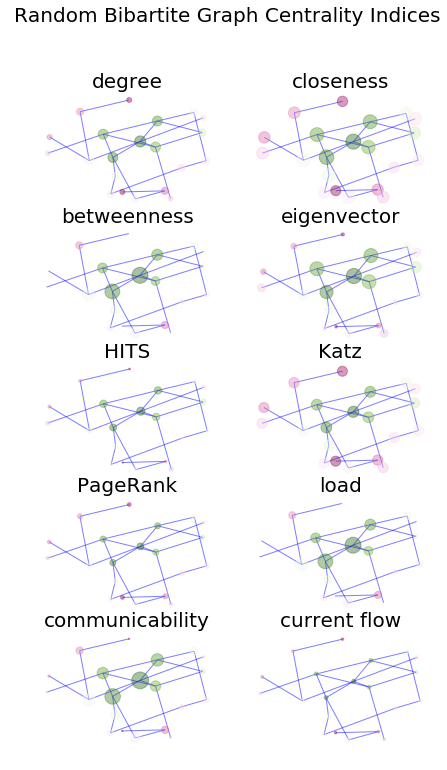

In [33]:
# Copy, paste and run cell 5 here:
pos=nx.spring_layout(G,1.)
valus=create_centralities_list(G,maxiter=2000,pphi=5,centList=[])
if isinstance(G,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(G): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=valus[j].keys(),
                               node_size=[500*x for x in valus[j].values()],
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #pink, yellow, green
    nx.draw_networkx_edges(G,pos=pos,edge_color='b', alpha=0.5)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

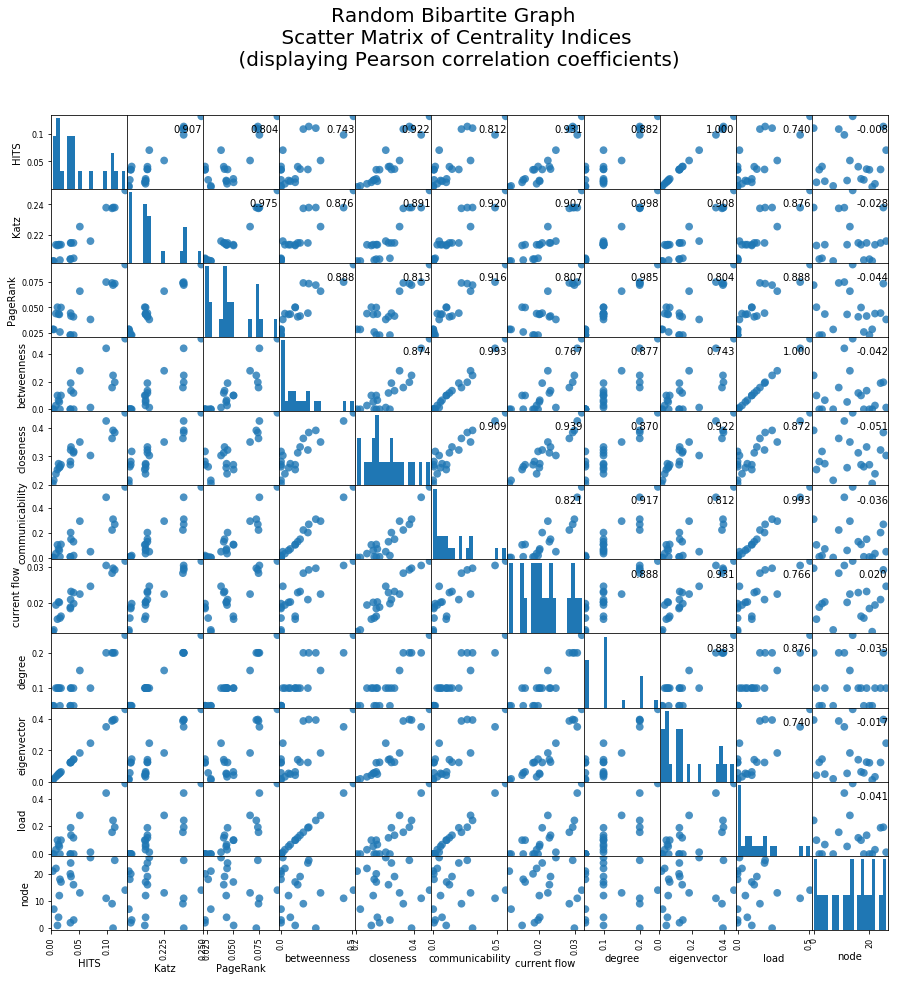

In [34]:
# Copy, paste and run cell 6 here:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

### 9. Random Power Law Tree

In [35]:
n=random.randint(25,35) #number of nodes
G=nx.random_powerlaw_tree(n,tries=1000)
name="Random Power Law Tree"

In [36]:
# Copy, paste and run cell 4 here:
central_pd=pd.DataFrame(create_centralities_list(G))
node="node"
central_df(G,node,central_pd)

node    degree  closeness  betweenness  eigenvector          HITS  \
0      0  0.029412   0.086514     0.000000     0.000002  5.784088e-07   
1      1  0.058824   0.094444     0.058824     0.000006  1.211552e-06   
2      2  0.058824   0.103343     0.114082     0.000017  4.776542e-06   
3      3  0.058824   0.113333     0.165775     0.000044  8.793534e-06   
4      4  0.058824   0.124542     0.213904     0.000118  3.409008e-05   
5      5  0.058824   0.137097     0.258467     0.000315  6.261256e-05   
6      6  0.058824   0.151111     0.299465     0.000841  2.426517e-04   
7      7  0.058824   0.166667     0.336898     0.002243  4.456530e-04   
8      8  0.058824   0.183784     0.370766     0.005984  1.727094e-03   
9      9  0.058824   0.202381     0.401070     0.015963  3.171969e-03   
10    10  0.088235   0.222222     0.468806     0.042585  1.229272e-02   
11    11  0.117647   0.239437     0.543672     0.099607  1.979551e-02   
12    12  0.147059   0.248175     0.598930     0.195003  5.630044e-02   
13    13  0.147059   0.242857     0.577540     0.301446  5.991931e-02   
14    14  0.147059   0.225166     0.499109     0.424981  1.227190e-01   
15    15  0.235294   0.200000     0.374332     0.572630  1.138364e-01   
16    16  0.029412   0.167488     0.000000     0.188196  5.434678e-02   
17    17  0.029412   0.182796     0.000000     0.013996  2.781216e-03   
18    18  0.029412   0.194286     0.000000     0.032738  9.450603e-03   
19    19  0.029412   0.194286     0.000000     0.032738  9.450603e-03   
20    20  0.029412   0.200000     0.000000     0.064091  1.273792e-02   
21    21  0.029412   0.200000     0.000000     0.064091  1.273792e-02   
22    22  0.029412   0.200000     0.000000     0.064091  1.273792e-02   
23    23  0.029412   0.196532     0.000000     0.099073  2.860616e-02   
24    24  0.029412   0.196532     0.000000     0.099073  2.860616e-02   
25    25  0.029412   0.196532     0.000000     0.099073  2.860616e-02   
26    26  0.029412   0.184783     0.000000     0.139672  2.776505e-02   
27    27  0.029412   0.184783     0.000000     0.139672  2.776505e-02   
28    28  0.029412   0.184783     0.000000     0.139672  2.776505e-02   
29    29  0.029412   0.167488     0.000000     0.188196  5.434678e-02   
30    30  0.029412   0.167488     0.000000     0.188196  5.434678e-02   
31    31  0.029412   0.167488     0.000000     0.188196  5.434678e-02   
32    32  0.029412   0.167488     0.000000     0.188196  5.434678e-02   
33    33  0.029412   0.167488     0.000000     0.188196  5.434678e-02   
34    34  0.029412   0.167488     0.000000     0.188196  5.434678e-02   

        Katz  PageRank      load  communicability  current flow  
0   0.159494  0.018351  0.000000         0.000847      0.002545  
1   0.167488  0.033094  0.058824         0.059706      0.002778  
2   0.167889  0.031083  0.114082         0.115249      0.003040  
3   0.167909  0.029958  0.165775         0.167097      0.003333  
4   0.167910  0.029323  0.213904         0.215345      0.003663  
5   0.167910  0.028953  0.258467         0.260017      0.004032  
6   0.167910  0.028718  0.299465         0.301131      0.004444  
7   0.167911  0.028534  0.336898         0.338702      0.004902  
8   0.167933  0.028338  0.370766         0.372773      0.005405  
9   0.168357  0.028058  0.401070         0.404453      0.005952  
10  0.176821  0.041397  0.468806         0.473683      0.006536  
11  0.185714  0.054463  0.543672         0.550516      0.007042  
12  0.194268  0.067579  0.598930         0.606574      0.007299  
13  0.194755  0.067617  0.577540         0.586189      0.007143  
14  0.195875  0.068254  0.499109         0.508780      0.006623  
15  0.217613  0.112524  0.374332         0.380362      0.005882  
16  0.162000  0.016242  0.000000         0.010697      0.004926  
17  0.159960  0.016015  0.000000         0.006339      0.005376  
18  0.160405  0.015859  0.000000         0.008896      0.005714  
19  0.160405  0.015859  0.000000         0.008896      

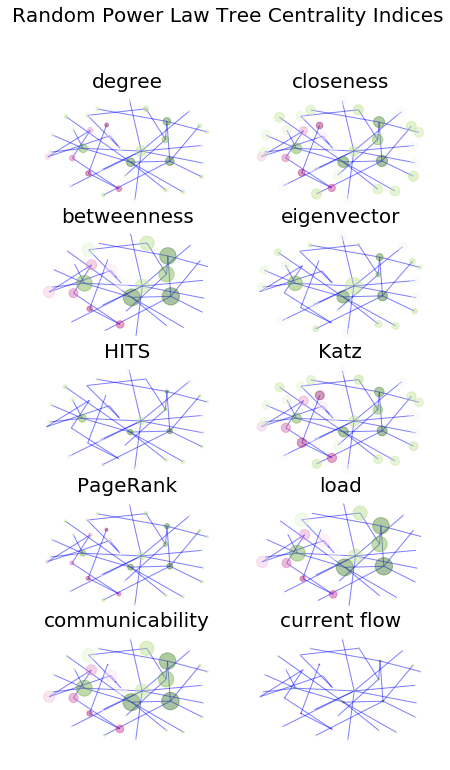

In [37]:
# Copy, paste and run cell 5 here:
pos=nx.spring_layout(G,1.)
valus=create_centralities_list(G,maxiter=2000,pphi=5,centList=[])
if isinstance(G,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(G): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=valus[j].keys(),
                               node_size=[500*x for x in valus[j].values()],
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #pink, yellow, green
    nx.draw_networkx_edges(G,pos=pos,edge_color='b', alpha=0.5)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

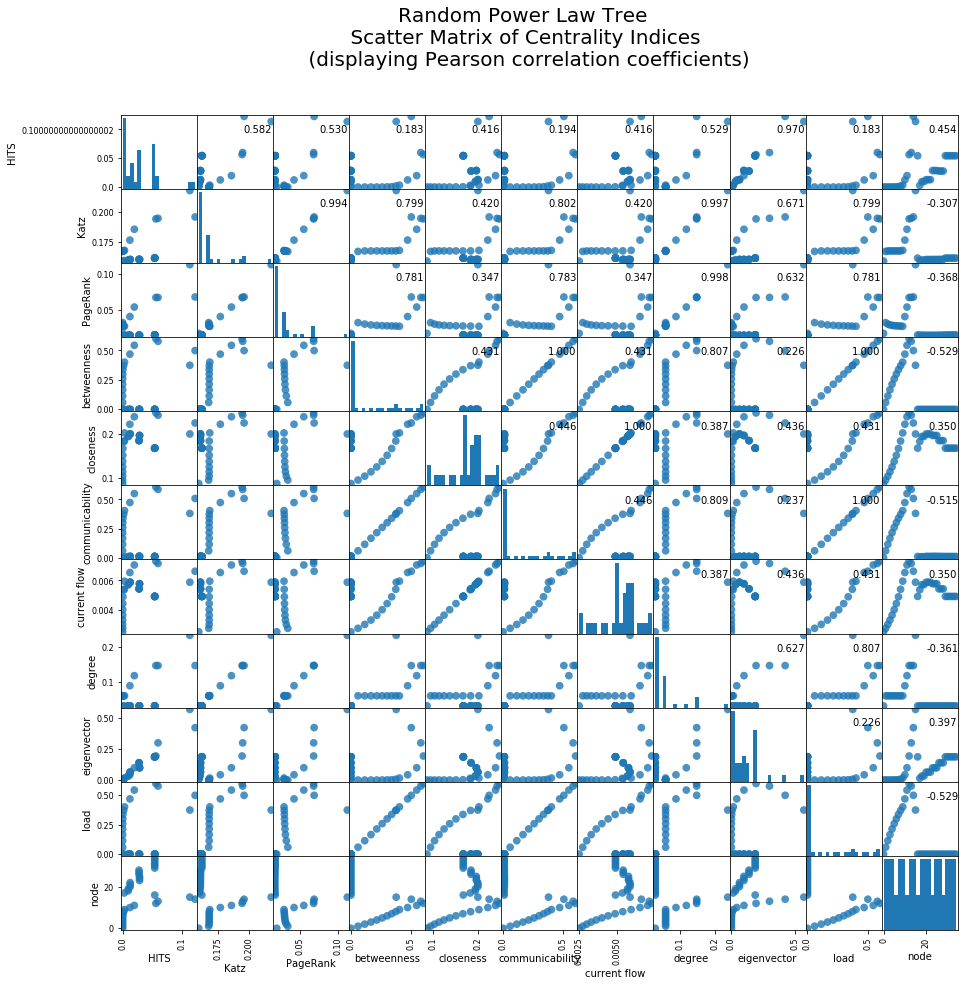

In [38]:
# Copy, paste and run cell 6 here:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

### 10. Erdos-Renyi Random Directed Graph

In [39]:
while True:
    nodes=random.randint(37,42)
    p=random.uniform(0.05,0.08)
    G=nx.erdos_renyi_graph(nodes,p,directed=True)
    if nx.is_weakly_connected(G)==True:
        break
name="Erdos-Renyi Random Directed Graph\n"

In [40]:
# Copy, paste and run cell 4 here:
central_pd=pd.DataFrame(create_centralities_list(G))
node="node"
central_df(G,node,central_pd)

node  out_degree  in_degree  closeness  betweenness   eigenvector  \
0      0       0.100      0.025   0.025000     0.014850  5.352581e-14   
1      1       0.000      0.075   0.226852     0.000000  1.082619e-01   
2      2       0.000      0.075   0.247328     0.000000  1.257948e-01   
3      3       0.050      0.075   0.202098     0.024231  1.141947e-01   
4      4       0.050      0.075   0.225781     0.051976  1.166234e-01   
5      5       0.050      0.075   0.209420     0.044498  1.141947e-01   
6      6       0.000      0.075   0.238235     0.000000  1.201165e-01   
7      7       0.000      0.025   0.040000     0.000000  4.458885e-11   
8      8       0.025      0.000   0.000000     0.000000  1.845718e-15   
9      9       0.125      0.000   0.000000     0.000000  1.845718e-15   
10    10       0.075      0.025   0.033333     0.006410  7.512071e-13   
11    11       0.100      0.000   0.000000     0.000000  1.845718e-15   
12    12       0.100      0.075   0.242857     0.129573  2.085788e-01   
13    13       0.025      0.050   0.069231     0.054808  2.267353e-10   
14    14       0.050      0.100   0.258036     0.035769  2.284245e-01   
15    15       0.075      0.050   0.050000     0.019872  1.052059e-13   
16    16       0.050      0.050   0.177301     0.045406  7.546006e-02   
17    17       0.050      0.025   0.186452     0.051549  1.257762e-01   
18    18       0.050      0.100   0.217293     0.061432  1.608904e-01   
19    19       0.075      0.050   0.236885     0.135481  2.434658e-01   
20    20       0.100      0.100   0.229365     0.125759  2.681602e-01   
21    21       0.025      0.025   0.033333     0.004487  7.512071e-13   
22    22       0.025      0.025   0.207914     0.015577  1.805424e-01   
23    23       0.025      0.050   0.225781     0.015064  2.111505e-01   
24    24       0.050      0.025   0.037500     0.022436  6.797778e-12   
25    25       0.075      0.050   0.215672     0.063761  1.327929e-01   
26    26       0.025      0.025   0.174096     0.000000  7.546006e-02   
27    27       0.075      0.025   0.025000     0.006303  5.352581e-14   
28    28       0.075      0.100   0.272642     0.094316  2.405281e-01   
29    29       0.150      0.050   0.160556     0.057532  5.899357e-02   
30    30       0.075      0.100   0.272642     0.169915  3.911881e-01   
31    31       0.050      0.050   0.193960     0.046955  5.469941e-02   
32    32       0.050      0.000   0.000000     0.000000  1.845718e-15   
33    33       0.050      0.025   0.240833     0.127778  1.278909e-01   
34    34       0.050      0.050   0.197945     0.032543  1.257762e-01   
35    35       0.025      0.125   0.324719     0.132906  2.726686e-01   
36    36       0.050      0.075   0.150862     0.006998  2.767035e-02   
37    37       0.025      0.025   0.040000     0.036538  4.458885e-11   
38    38       0.000      0.125   0.237403     0.000000  2.660026e-01   
39    39       0.075      0.100   0.270093     0.122970  3.849259e-01   
40    40       0.050      0.000   0.000000     0.000000  1.845718e-15   

       HITS_hubs    HITS_auths      Katz  PageRank      load  
0   1.038184e-02  3.439931e-40  0.146331  0.009234  0.014850  
1   0.000000e+00  1.088424e-02  0.162930  0.031075  0.000000  
2   0.000000e+00  3.678057e-02  0.162881  0.027374  0.000000  
3   5.151256e-02  3.092938e-02  0.161415  0.022457  0.024359  
4   4.819473e-03  4.645779e-02  0.162897  0.028964  0.052244  
5   1.653924e-02  4.069260e-02  0.161764  0.023275  0.044551  
6   0.000000e+00  2.744165e-02  0.162952  0.030700  0.000000  
7   0.000000e+00  3.439931e-40  0.146698  0.012521  0.000000  
8   5.800680e-03  0.000000e+00  0.139363  0.006480  0.000000  
9   5.994518e-02  0.000000e+00  0.139363  0.006480  0.000000  
10  1.422326e-02  3.175722e-03  0.146679  0.008443  0.006250  
11  4.845383e-02  0.000000e+00  0.139363  0.006480  0.000000  
12  8.780735e-02  2.368446e-02  0.162648  0.036986  0.129754  
13  2.287562e-02  3.483025e-03  0.154014  0.019085  0.0

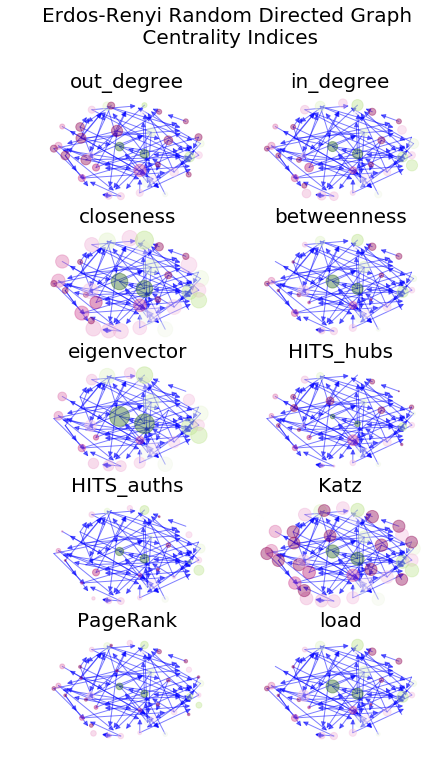

In [41]:
# Copy, paste and run cell 5 here:
pos=nx.spring_layout(G,1.5)
valus=create_centralities_list(G,maxiter=2000,pphi=5,centList=[])
if isinstance(G,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(G): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=valus[j].keys(),
                               node_size=[1000*x for x in valus[j].values()],
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #pink, yellow, green
    nx.draw_networkx_edges(G,pos=pos,edge_color='b', alpha=0.5)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

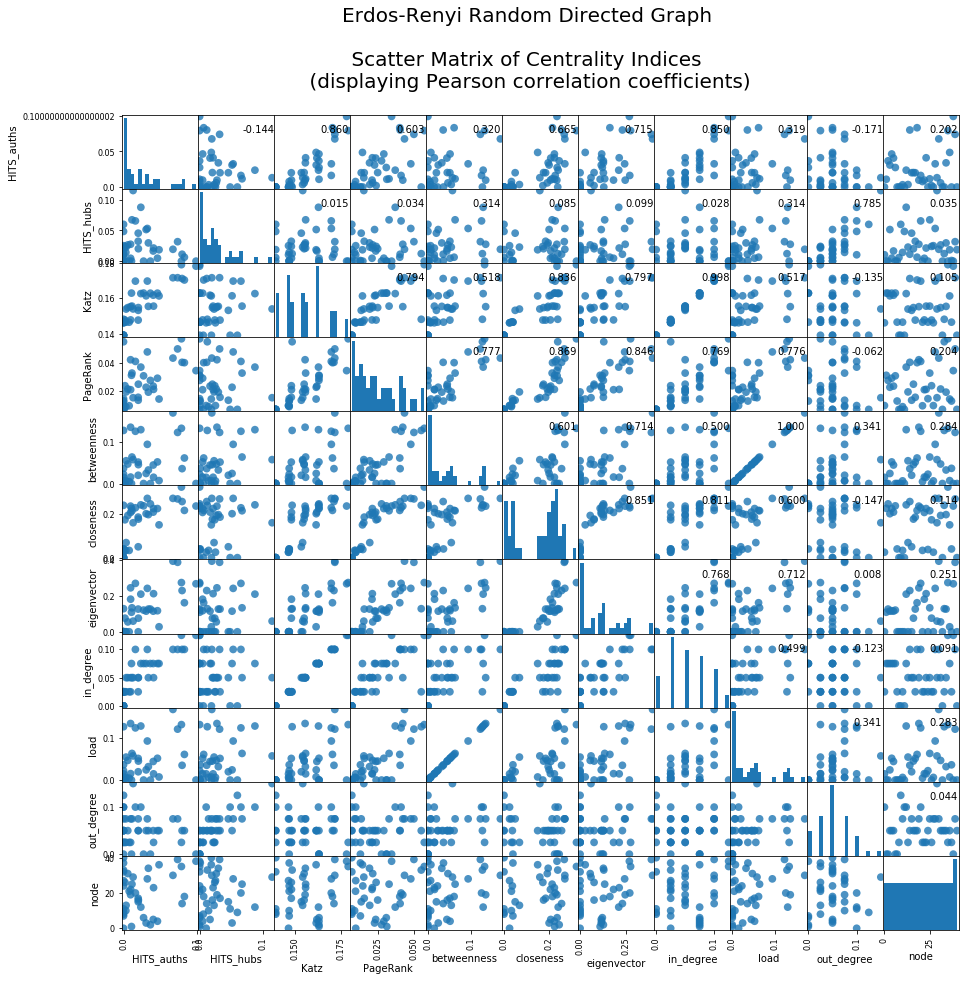

In [42]:
# Copy, paste and run cell 6 here:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

### 11. Gnm Random Weighted Graph

In [43]:
def weight_attr(G,maxw):
    # G is a graph
    # maxw is a positive integer (maximum weight value)
    weight={}
    for edge in G.edges():
        ed=edge[0]
        de=edge[1]
        G[ed][de]['weight']=random.randrange(1,maxw)
        weight[(ed,de)]=G[ed][de]['weight']
    return weight

In [44]:
while True:
    nodes=random.randint(47,52)
    edges=random.randint(70,80)
    G=nx.gnm_random_graph(nodes,edges)
    maxw=random.randint(7,12)
    weight=weight_attr(G,maxw)
    w_edges=[(x,y,z) for (x,y),z in weight.items()]
    G.add_weighted_edges_from(w_edges)
    if nx.is_connected(G)==True:
        break
name="Gnm Random Weighted Graph\n"

In [45]:
# Copy, paste and run cell 4 here:
central_pd=pd.DataFrame(create_centralities_list(G))
node="node"
central_df(G,node,central_pd)

node    degree  closeness  betweenness  eigenvector      HITS      Katz  \
0      0  0.083333   0.292683     0.054248     0.115789  0.021136  0.148072   
1      1  0.062500   0.292683     0.055408     0.092720  0.016305  0.141329   
2      2  0.062500   0.309677     0.061237     0.112724  0.015933  0.142039   
3      3  0.062500   0.298137     0.051103     0.099016  0.012932  0.141347   
4      4  0.041667   0.268156     0.007927     0.063630  0.018012  0.134223   
5      5  0.041667   0.244898     0.007742     0.037419  0.001096  0.133841   
6      6  0.083333   0.320000     0.056376     0.192186  0.031137  0.149599   
7      7  0.062500   0.301887     0.036037     0.123259  0.018373  0.141805   
8      8  0.020833   0.200000     0.000000     0.011120  0.000752  0.126438   
9      9  0.062500   0.285714     0.037773     0.083531  0.013456  0.141657   
10    10  0.020833   0.258065     0.000000     0.056876  0.001211  0.127886   
11    11  0.020833   0.224299     0.000000     0.020225  0.001455  0.127113   
12    12  0.062500   0.309677     0.046205     0.120790  0.025168  0.142063   
13    13  0.062500   0.285714     0.046686     0.075697  0.001058  0.141301   
14    14  0.062500   0.309677     0.040324     0.116872  0.015764  0.142121   
15    15  0.083333   0.296296     0.051263     0.093305  0.013796  0.148098   
16    16  0.104167   0.360902     0.128482     0.260785  0.035240  0.157200   
17    17  0.104167   0.333333     0.071049     0.277903  0.049274  0.157196   
18    18  0.062500   0.274286     0.027142     0.061639  0.009051  0.141601   
19    19  0.104167   0.335664     0.082293     0.242442  0.048103  0.156762   
20    20  0.020833   0.246154     0.000000     0.039585  0.004226  0.127522   
21    21  0.083333   0.358209     0.101389     0.231043  0.055543  0.151001   
22    22  0.041667   0.298137     0.025281     0.088840  0.023349  0.134959   
23    23  0.062500   0.324324     0.047769     0.164439  0.020795  0.142870   
24    24  0.083333   0.340426     0.144701     0.161836  0.021498  0.149537   
25    25  0.104167   0.324324     0.174634     0.151282  0.023274  0.155538   
26    26  0.020833   0.223256     0.000000     0.017789  0.001833  0.126795   
27    27  0.041667   0.311688     0.011998     0.124185  0.009549  0.135746   
28    28  0.104167   0.363636     0.111289     0.257236  0.054292  0.157191   
29    29  0.062500   0.311688     0.039147     0.127392  0.031643  0.141487   
30    30  0.083333   0.307692     0.048899     0.218974  0.053187  0.149341   
31    31  0.020833   0.236453     0.000000     0.057296  0.021245  0.127213   
32    32  0.041667   0.248705     0.041667     0.042495  0.005180  0.133844   
33    33  0.125000   0.345324     0.164097     0.217360  0.033361  0.162816   
34    34  0.104167   0.369231     0.127004     0.275970  0.063663  0.157503   
35    35  0.041667   0.284024     0.022680     0.086443  0.010686  0.134620   
36    36  0.083333   0.287425     0.075850     0.077295  0.005724  0.147349   
37    37  0.020833   0.227488     0.000000     0.024262  0.001184  0.126812   
38    38  0.083333   0.287425     0.059877     0.080188  0.013466  0.148362   
39    39  0.041667   0.265193     0.016851     0.050323  0.003788  0.134218   
40    40  0.062500   0.294479     0.056117     0.086755  0.005811  0.141626   
41    41  0.062500   0.285714     0.067302     0.067983  0.008412  0.140980   
42    42  0.062500   0.277457     0.032215     0.067307  0.003111  0.140608   
43    43  0.041667   0.305732     0.006184     0.135647  0.015618  0.135459   
44    44  0.083333   0.317881     0.031548     0.225700  0.043965  0.150001   
45    45  0.062500   0.284024     0.040374     0.062075  0.009056  0.140655   
46    46  0.125000   0.369231     0.152062     0.277446  0.082801  0.163612   
47    47  0.041667   0.253968     0.007314     0.052916  0.006554  0.133880   
48    48  0.083333   0.340426     0.084762     0.174574  0.017934  0.149917   

    PageRank      load  communicability  current flow

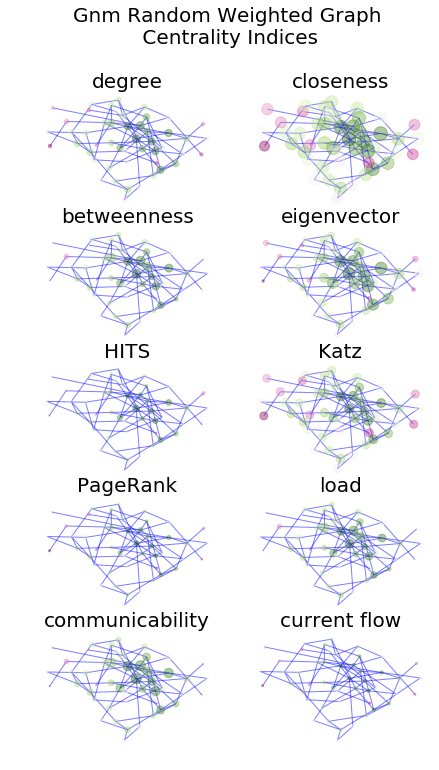

In [46]:
# Copy, paste and run cell 5 here:
pos=nx.spring_layout(G,1.)
valus=create_centralities_list(G,maxiter=2000,pphi=5,centList=[])
if isinstance(G,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(G): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=valus[j].keys(),
                               node_size=[500*x for x in valus[j].values()],
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #pink, yellow, green
    nx.draw_networkx_edges(G,pos=pos,edge_color='b', alpha=0.5)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

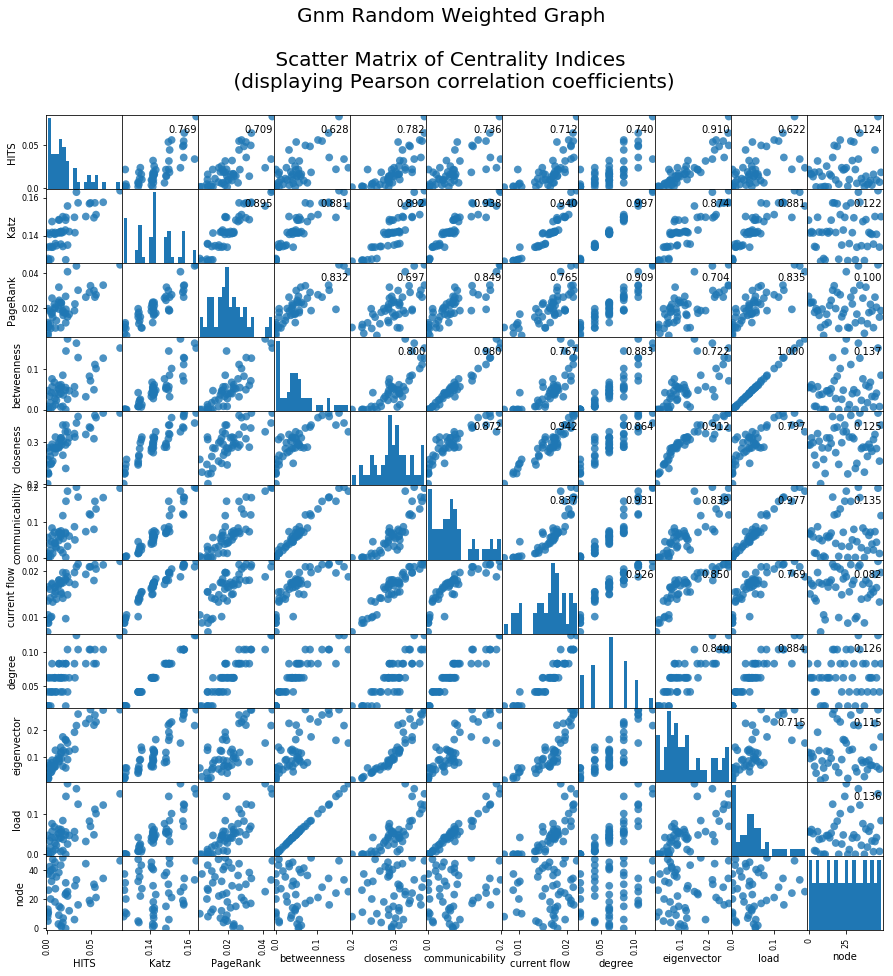

In [47]:
# Copy, paste and run cell 6 here:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

### 12. Erdos-Renyi Random Weighted Directed Graph

In [48]:
while True:
    nodes=random.randint(47,52)
    p=random.uniform(0.05,0.08)
    G=nx.erdos_renyi_graph(nodes,p,directed=True)
    maxw=random.randint(7,12)
    weight=weight_attr(G,maxw)
    w_edges=[(x,y,z) for (x,y),z in weight.items()]
    G.add_weighted_edges_from(w_edges)
    if nx.is_weakly_connected(G)==True:
        break
name="Erdos-Renyi Random Weighted Directed Graph\n"

In [49]:
# Copy, paste and run cell 4 here:
central_pd=pd.DataFrame(create_centralities_list(G))
node="node"
central_df(G,node,central_pd)

node  out_degree  in_degree  closeness  betweenness   eigenvector  \
0      0    0.083333   0.083333   0.310952     0.024763  1.652274e-01   
1      1    0.083333   0.104167   0.346021     0.032957  1.808250e-01   
2      2    0.145833   0.083333   0.356751     0.076152  1.312644e-01   
3      3    0.041667   0.145833   0.393340     0.067975  1.813758e-01   
4      4    0.062500   0.104167   0.368167     0.033672  1.371865e-01   
5      5    0.104167   0.041667   0.291271     0.040567  7.382431e-02   
6      6    0.041667   0.041667   0.298837     0.029009  6.235123e-02   
7      7    0.020833   0.062500   0.310952     0.019309  1.025338e-01   
8      8    0.125000   0.041667   0.298837     0.076873  1.065697e-01   
9      9    0.041667   0.145833   0.393340     0.034282  3.057887e-01   
10    10    0.062500   0.062500   0.308865     0.024145  7.706671e-02   
11    11    0.125000   0.125000   0.377220     0.171060  2.498575e-01   
12    12    0.041667   0.104167   0.362369     0.048574  1.914274e-01   
13    13    0.000000   0.062500   0.324324     0.000000  9.622577e-02   
14    14    0.062500   0.000000   0.000000     0.000000  7.596039e-15   
15    15    0.062500   0.062500   0.250113     0.028530  3.702766e-02   
16    16    0.125000   0.000000   0.000000     0.000000  7.596039e-15   
17    17    0.041667   0.000000   0.000000     0.000000  7.596039e-15   
18    18    0.104167   0.062500   0.296909     0.028604  1.241398e-01   
19    19    0.041667   0.020833   0.217079     0.004579  1.475569e-02   
20    20    0.083333   0.145833   0.374153     0.064699  2.484198e-01   
21    21    0.041667   0.104167   0.371136     0.067396  1.902410e-01   
22    22    0.083333   0.062500   0.319589     0.040423  1.327992e-01   
23    23    0.020833   0.083333   0.340895     0.011018  1.639181e-01   
24    24    0.041667   0.083333   0.340895     0.014235  1.384630e-01   
25    25    0.104167   0.041667   0.280615     0.024417  6.958497e-02   
26    26    0.125000   0.041667   0.289439     0.047277  5.687133e-02   
27    27    0.104167   0.062500   0.326389     0.035997  1.302609e-01   
28    28    0.187500   0.104167   0.343439     0.083566  1.767992e-01   
29    29    0.041667   0.041667   0.260005     0.011655  5.041159e-02   
30    30    0.020833   0.041667   0.293126     0.008428  1.124490e-01   
31    31    0.083333   0.020833   0.233608     0.008607  2.967993e-02   
32    32    0.104167   0.041667   0.257100     0.044054  4.250602e-02   
33    33    0.104167   0.104167   0.333484     0.055673  1.454609e-01   
34    34    0.062500   0.104167   0.362369     0.062630  1.663990e-01   
35    35    0.104167   0.125000   0.359538     0.091684  1.935775e-01   
36    36    0.041667   0.083333   0.335918     0.068947  1.526254e-01   
37    37    0.062500   0.083333   0.317385     0.029767  9.868343e-02   
38    38    0.041667   0.083333   0.331085     0.049519  1.230524e-01   
39    39    0.083333   0.104167   0.308865     0.040239  1.601206e-01   
40    40    0.062500   0.020833   0.273934     0.038045  5.298232e-02   
41    41    0.062500   0.125000   0.386730     0.080165  2.217423e-01   
42    42    0.041667   0.062500   0.275574     0.030466  8.253955e-02   
43    43    0.041667   0.041667   0.221254     0.013182  3.125401e-02   
44    44    0.062500   0.062500   0.346021     0.081395  1.617013e-01   
45    45    0.125000   0.104167   0.346021     0.073244  2.236481e-01   
46    46    0.062500   0.020833   0.280615     0.035418  6.175421e-02   
47    47    0.062500   0.104167   0.365245     0.043341  2.229438e-01   
48    48    0.083333   0.104167   0.348643     0.042024  1.724206e-01   

    HITS_hubs  HITS_auths      Katz  PageRank      load  
0    0.017530    0.013823  0.145633  0.017541  0.025034  
1    0.011114    0.031752  0.153404  0.021282  0.033257  
2    0.038353    0.005376  0.145534  0.033324  0.077834  
3    0.006295    0.057197  0.165466  0.032409  0.066399  
4    0.022172    0.027474  0.151410  0.016815  0.033911  
5    

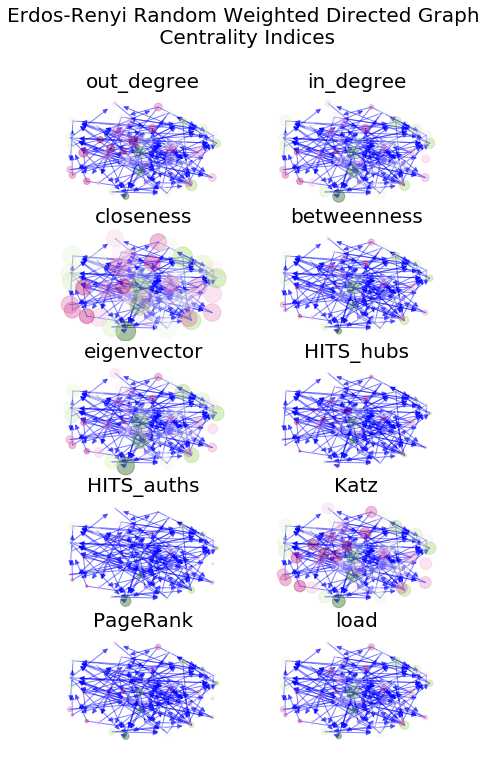

In [50]:
# Copy, paste and run cell 5 here:
pos=nx.spring_layout(G,2.)
valus=create_centralities_list(G,maxiter=2000,pphi=5,centList=[])
if isinstance(G,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(G): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=valus[j].keys(),
                               node_size=[1000*x for x in valus[j].values()],
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #pink, yellow, green
    nx.draw_networkx_edges(G,pos=pos,edge_color='b', alpha=0.5)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

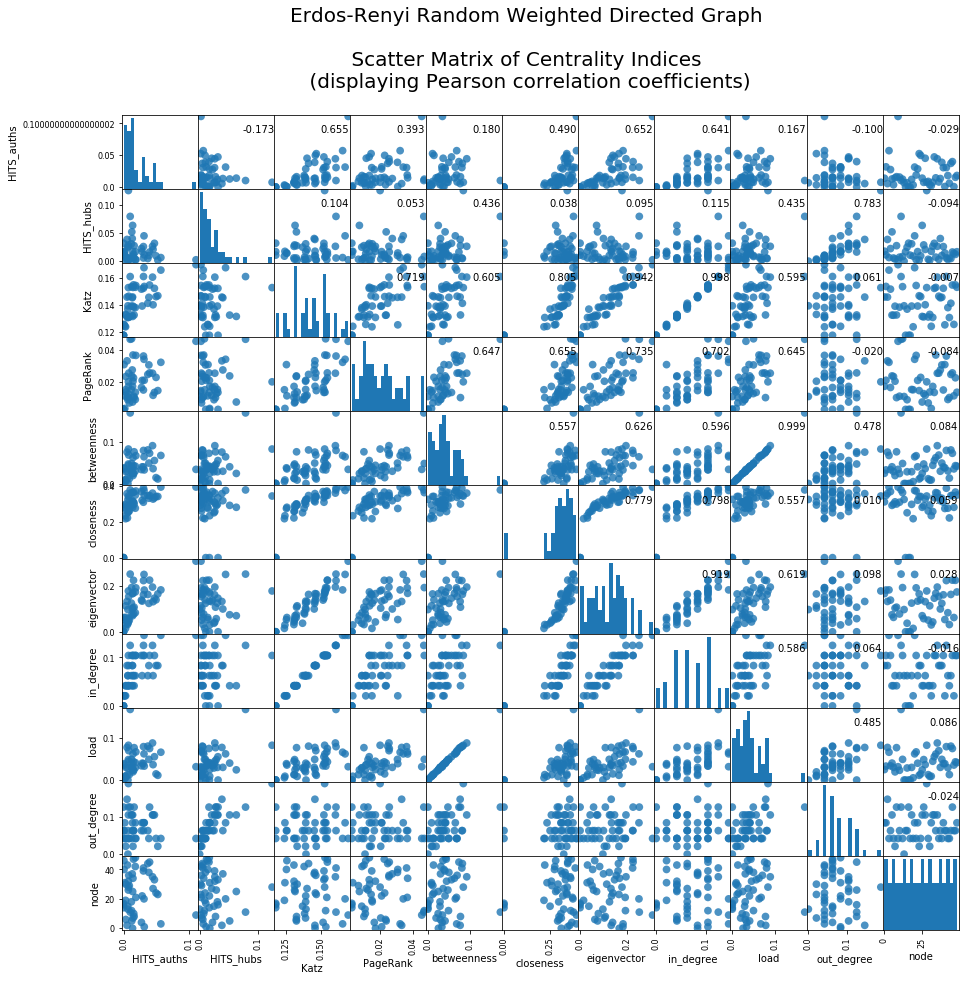

In [51]:
# Copy, paste and run cell 6 here:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);